Import liberaries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from typing import List, Dict
from scipy import stats

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, IsolationForest, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion

import warnings
warnings.filterwarnings('ignore')

## Part 1

In [2]:
train_csv = pd.read_csv('train.csv')

In [3]:
def missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

In [4]:
missing_values(train_csv)

sha256                    0
size                      0
vsize                  1935
imports                1739
exports                2093
has_debug              2927
has_relocations        3324
has_resources          1961
has_signature          1937
has_tls                2898
symbols                2656
numstrings             2718
paths                  3660
urls                   2349
registry               2525
MZ                     3089
printables             2739
avlength               2757
file_type_trid            0
file_type_prob_trid       0
A                      3704
B                      3751
C                      2051
label                     0
dtype: int64

Statistics:

In [5]:
pd.options.display.float_format = '{:.2f}'.format
train_csv.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,...,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,label
count,60000.00,58065.00,58261.00,57907.00,57073.00,56676.00,58039.00,58063.00,57102.00,57344.00,...,56340.00,57651.00,57475.00,56911.00,57261.00,57243.00,60000.00,56296.00,56249.00,60000.00
mean,1501019.14,1965704.26,106.20,30.80,0.40,0.54,0.86,0.25,0.23,40.17,...,1.64,12.50,0.43,16.26,120771.03,32.66,53.68,4.02,5.81,0.50
std,4727390.68,20178814.65,213.45,508.08,0.49,0.50,0.35,0.44,0.42,1239.70,...,37.00,71.63,11.50,82.19,605220.32,1094.71,20.63,6.37,0.64,0.50
min,298.00,544.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,5.00,5.00,17.50,-17.78,0.00,0.00
25%,107008.00,122880.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,6013.00,7.45,38.40,-0.29,5.47,0.00
50%,483328.00,421888.00,28.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,4.00,22835.00,12.01,43.30,3.66,5.86,0.50
75%,1239326.00,1601536.00,152.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,...,1.00,10.00,0.00,11.00,76156.00,17.31,69.10,7.86,6.34,1.00
max,325353693.00,4278288384.00,15047.00,48840.00,1.00,1.00,1.00,1.00,1.00,181660.00,...,5324.00,9387.00,2492.00,7010.00,50346873.00,207990.93,100.00,43.93,6.58,1.00


In [6]:
plot_size = plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

Visualizations:

In [7]:
def build_histogram(data, bin_size, title):
    plot_size
    plt.hist(data, bins=bin_size)
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [8]:
def scatter_plot(x, y, xlabel, ylabel, title):
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

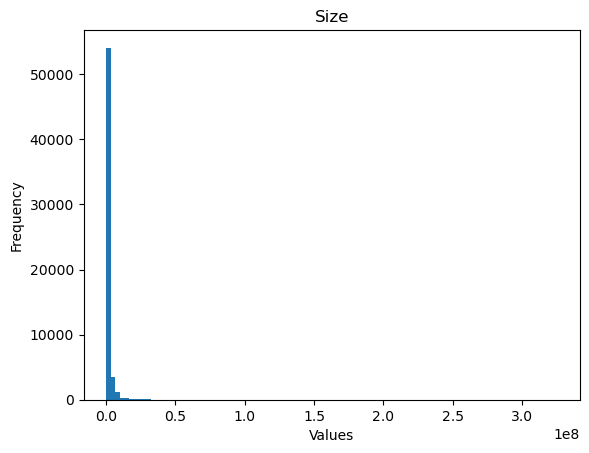

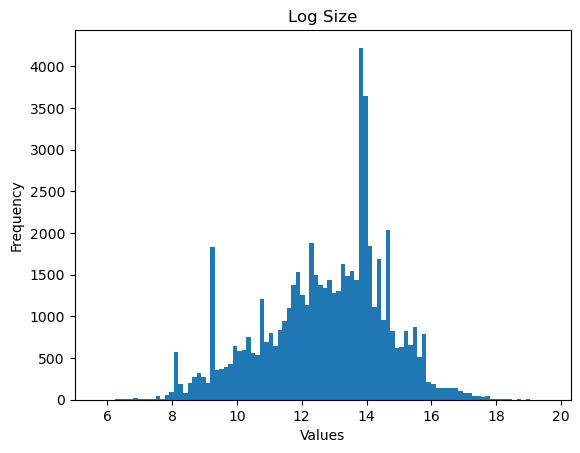

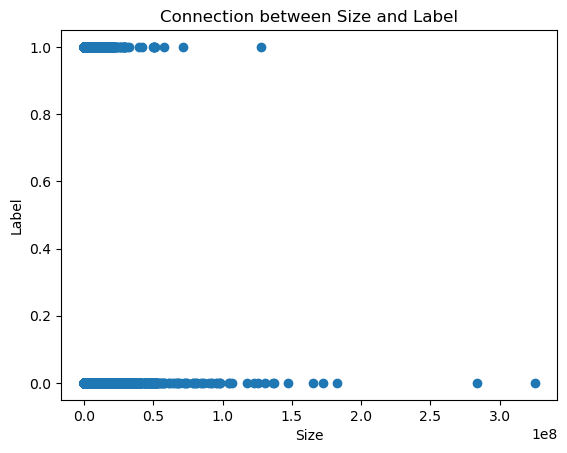

In [9]:
build_histogram(train_csv['size'], 100, 'Size')

build_histogram(np.log(train_csv['size']), 100, 'Log Size')

scatter_plot(train_csv['size'], train_csv['label'], 'Size', 'Label', 'Connection between Size and Label')

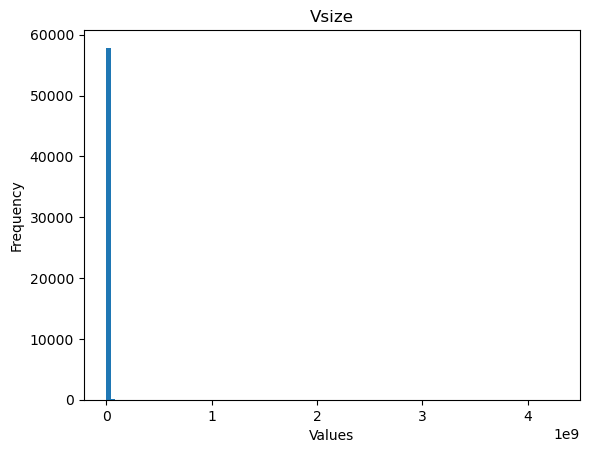

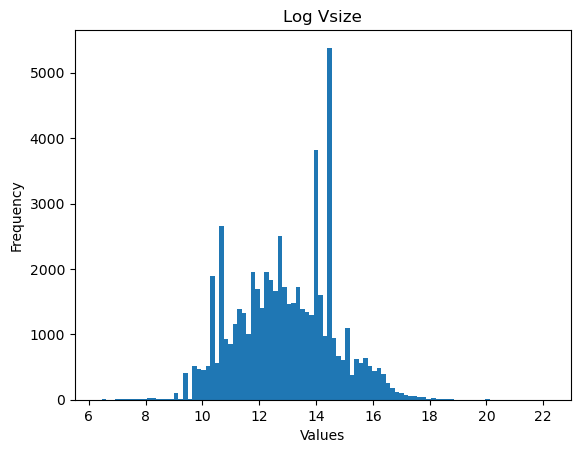

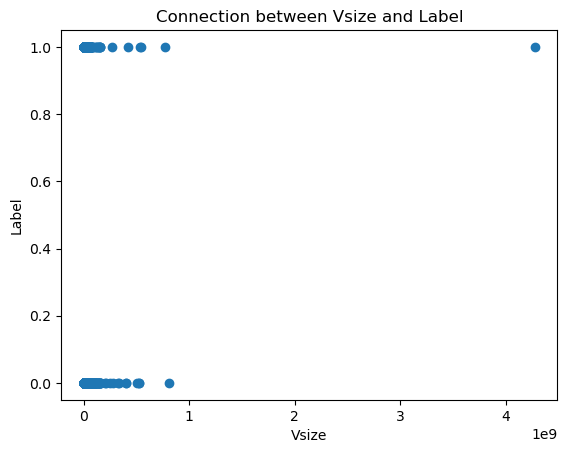

In [10]:
build_histogram(train_csv['vsize'], 100, 'Vsize')

build_histogram(np.log(train_csv['vsize']), 100, 'Log Vsize')

scatter_plot(train_csv['vsize'], train_csv['label'], 'Vsize', 'Label', 'Connection between Vsize and Label')

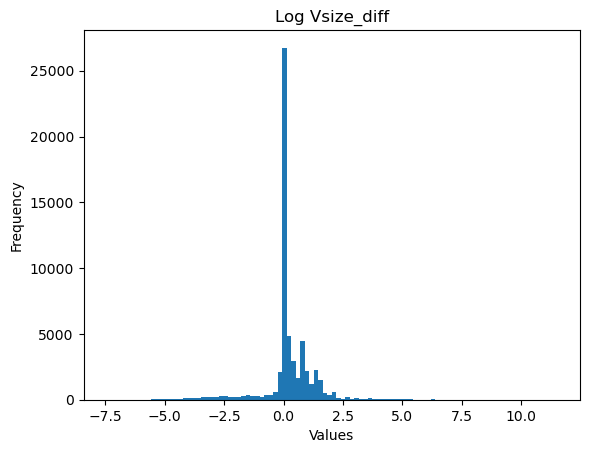

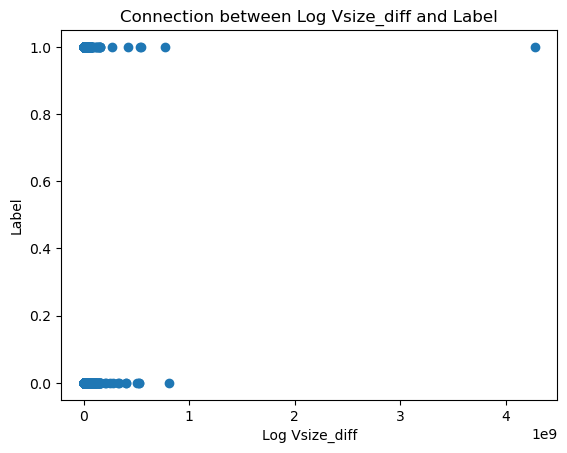

In [11]:
data = np.log(train_csv['vsize']) - np.log(train_csv['size']) 

build_histogram(data, 100, 'Log Vsize_diff')

scatter_plot(train_csv['vsize'], train_csv['label'], 'Log Vsize_diff', 'Label', 'Connection between Log Vsize_diff and Label')

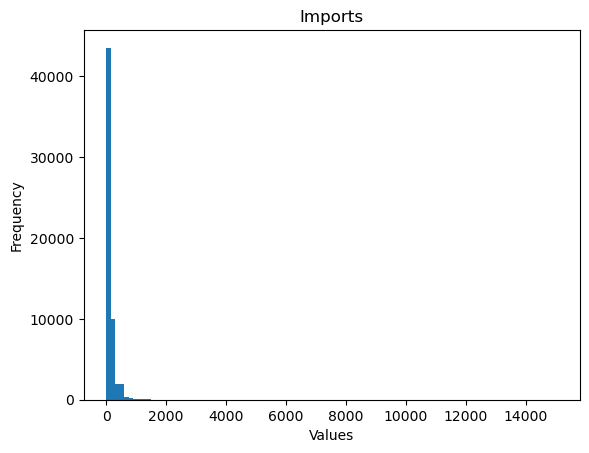

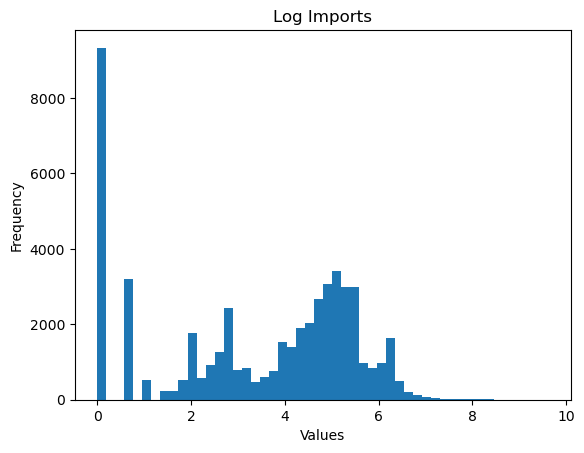

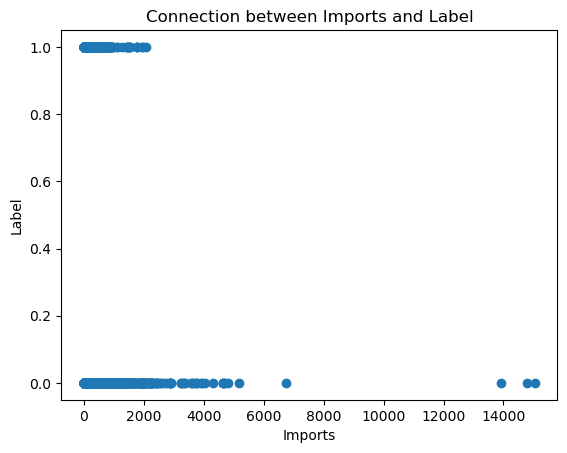

In [12]:
build_histogram(train_csv['imports'], 100, 'Imports')
 
build_histogram(np.log(train_csv['imports'][train_csv['imports'] > 0]), 50, 'Log Imports')

scatter_plot(train_csv['imports'], train_csv['label'], 'Imports', 'Label', 'Connection between Imports and Label')

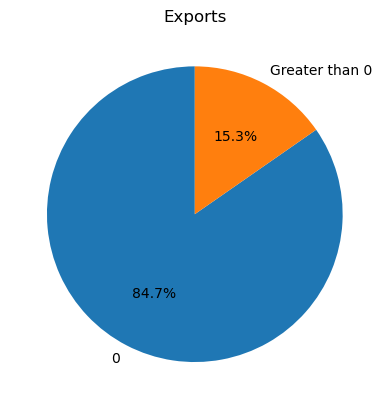

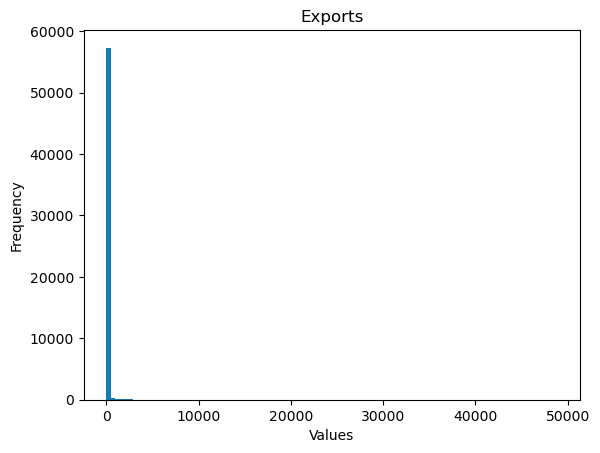

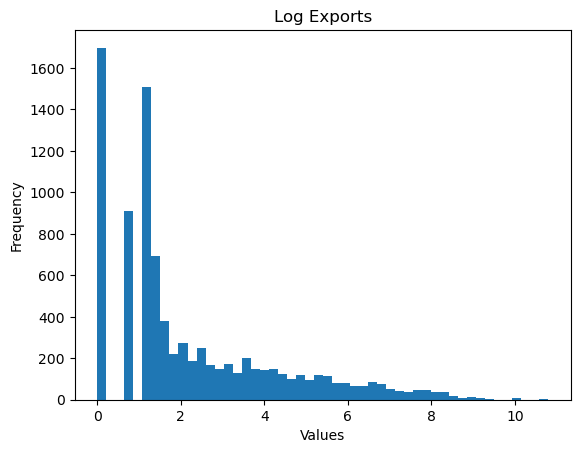

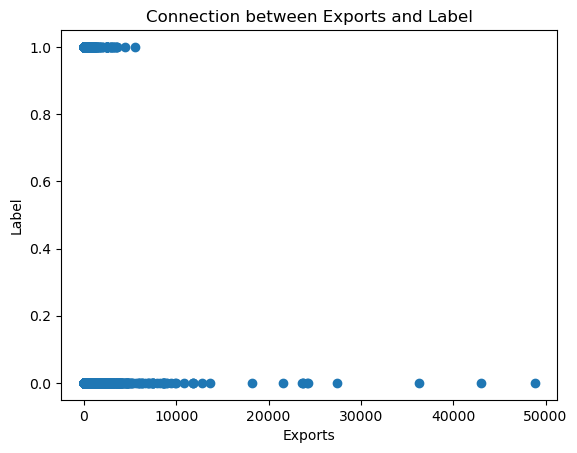

In [13]:
bins = [-1, 0.9, 200_000]
labels = ['0', 'Greater than 0']
train_csv['exports_range'] = pd.cut(train_csv['exports'], bins=bins, labels=labels)
counts = train_csv['exports_range'].value_counts().sort_index()
train_csv.drop('exports_range', axis=1, inplace = True)
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Exports')
plt.show()

build_histogram(train_csv['exports'], 100, 'Exports')

build_histogram(np.log(train_csv['exports'][train_csv['exports'] > 0]), 50, 'Log Exports')

scatter_plot(train_csv['exports'], train_csv['label'], 'Exports', 'Label', 'Connection between Exports and Label')

In [14]:
def pie_chart_with_counts(data, title):
    
    value_counts = data.value_counts(dropna=False)
    labels = value_counts.index.astype(str)
    labels = np.where(labels == 'nan', 'NULL', labels)
    values = value_counts.values
    
    plt.pie(values, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sum(values))})", startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

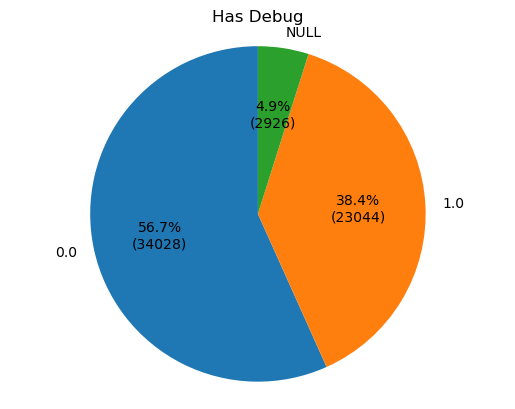

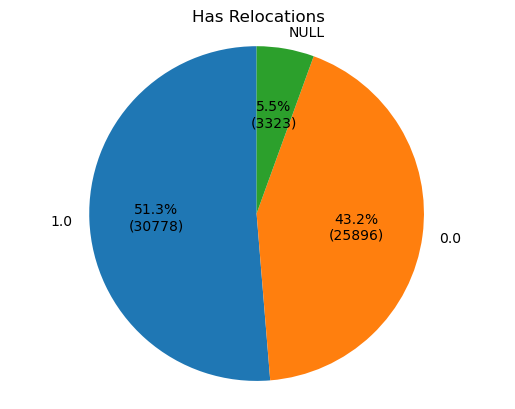

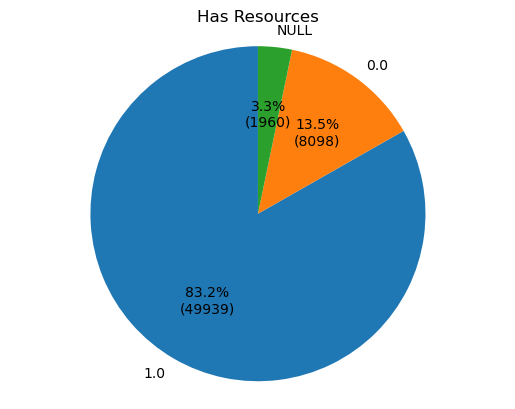

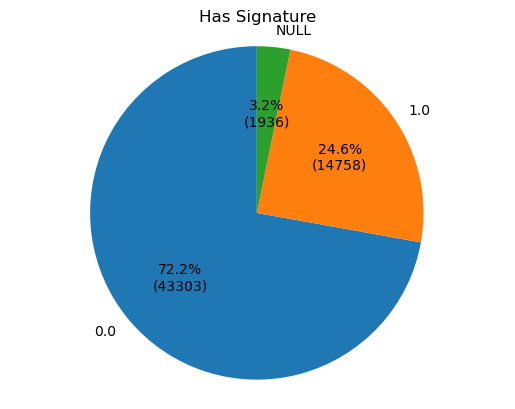

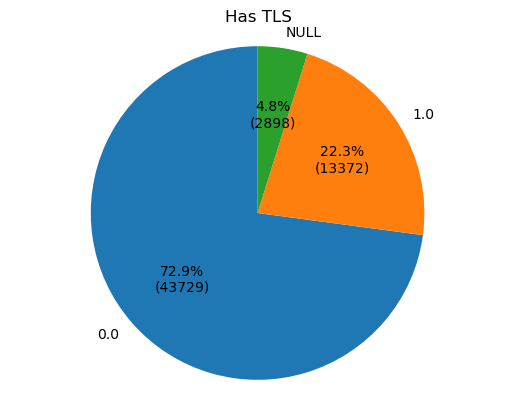

In [15]:
pie_chart_with_counts(train_csv['has_debug'], 'Has Debug')
pie_chart_with_counts(train_csv['has_relocations'], 'Has Relocations')
pie_chart_with_counts(train_csv['has_resources'], 'Has Resources')
pie_chart_with_counts(train_csv['has_signature'], 'Has Signature')
pie_chart_with_counts(train_csv['has_tls'], 'Has TLS')


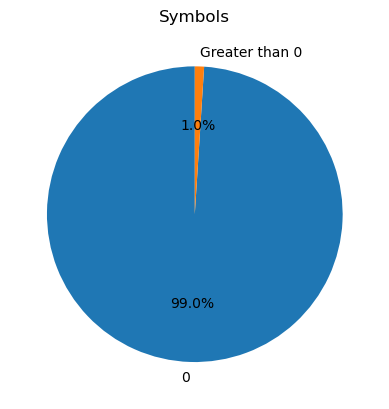

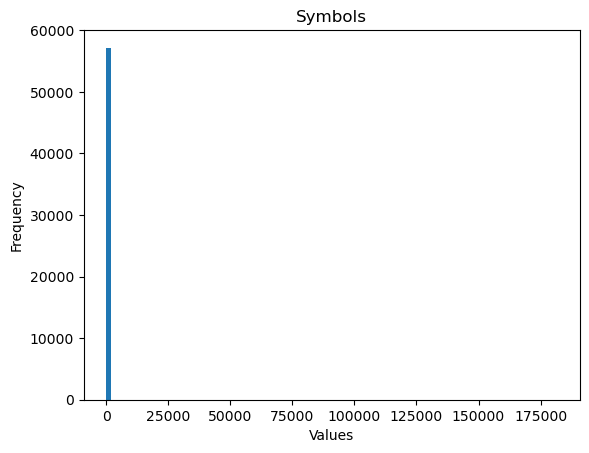

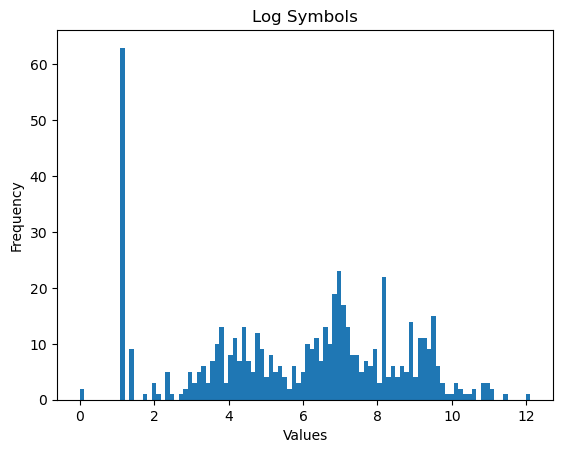

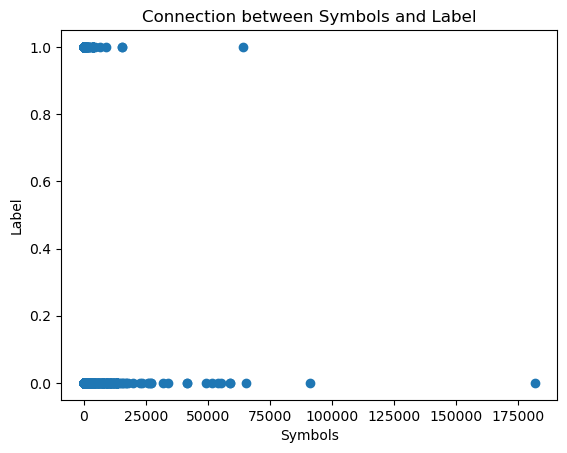

3233
56767


In [16]:
bins = [-1, 0.9, 200_000]
labels = ['0', 'Greater than 0']
train_csv['symbols_range'] = pd.cut(train_csv['symbols'], bins=bins, labels=labels)
counts = train_csv['symbols_range'].value_counts().sort_index()
train_csv.drop('symbols_range', axis=1, inplace = True)
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Symbols')
plt.show()

build_histogram(train_csv['symbols'], 100, 'Symbols')

build_histogram(np.log( train_csv['symbols'][ train_csv['symbols'] > 0]), 100, 'Log Symbols')

scatter_plot(train_csv['symbols'], train_csv['label'], 'Symbols', 'Label', 'Connection between Symbols and Label')

non_zero_count = np.count_nonzero(train_csv['symbols'])
zero_count = len(train_csv['symbols']) - np.count_nonzero(train_csv['symbols'])
print(non_zero_count)
print(zero_count)



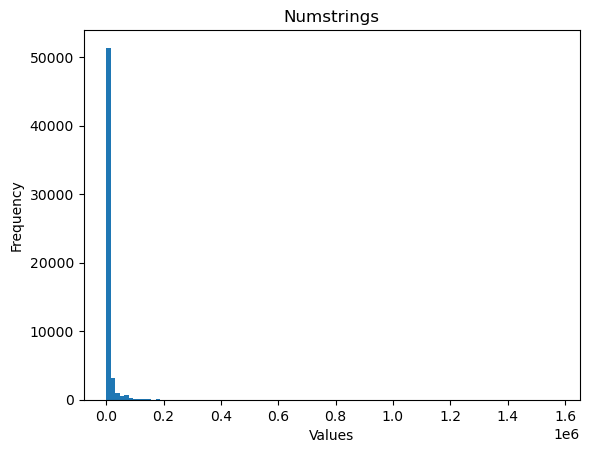

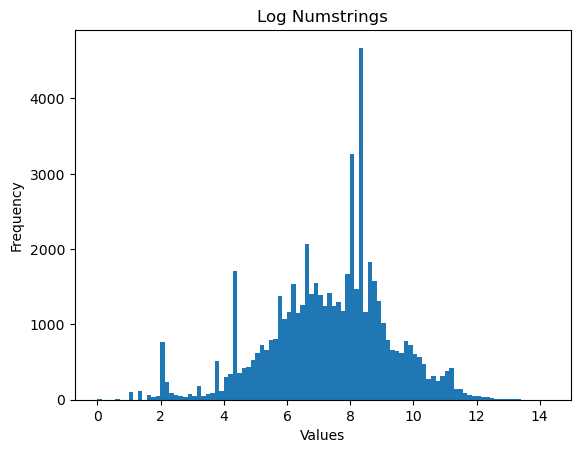

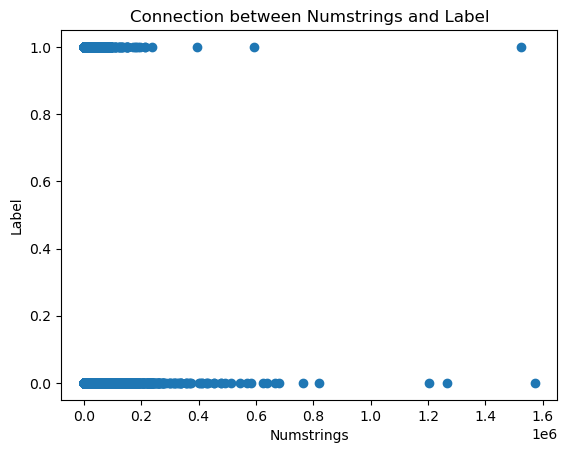

In [17]:
build_histogram(train_csv['numstrings'], 100, 'Numstrings')

build_histogram(np.log(train_csv['numstrings']), 100, 'Log Numstrings')

scatter_plot(train_csv['numstrings'], train_csv['label'], 'Numstrings', 'Label', 'Connection between Numstrings and Label')

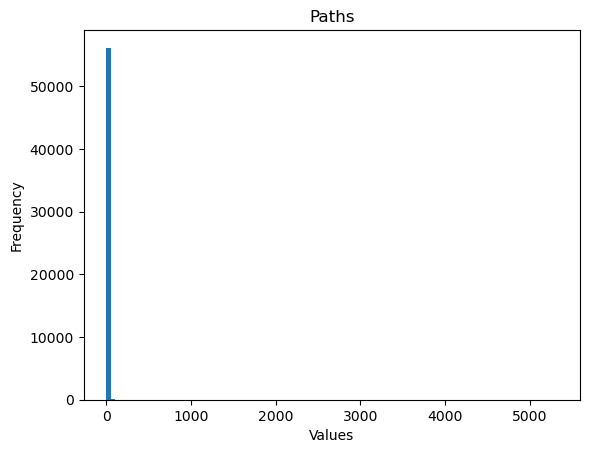

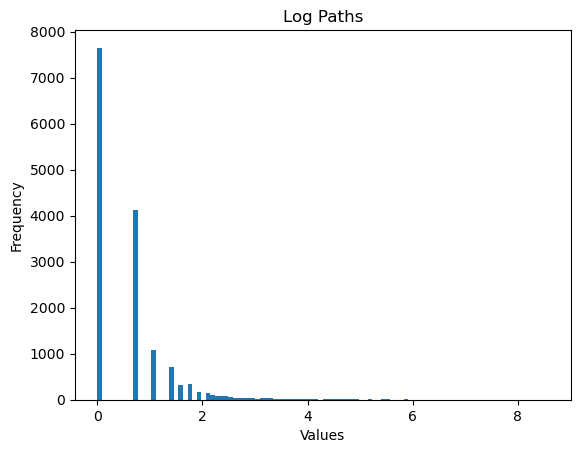

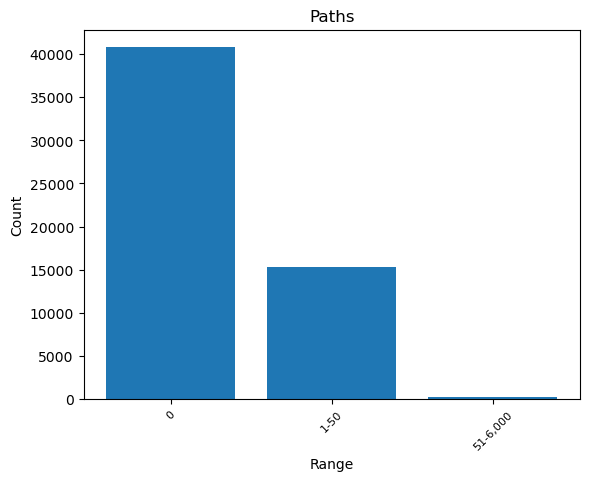

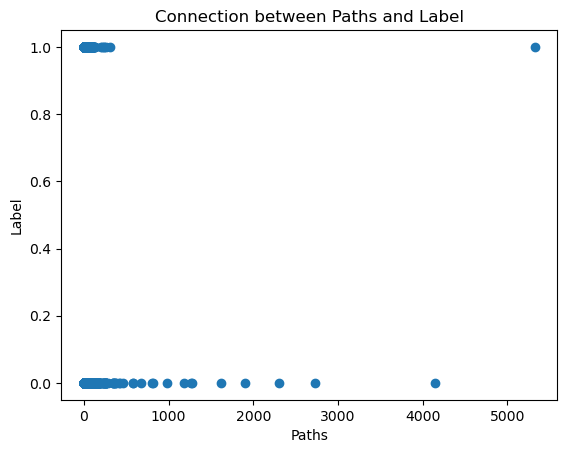

In [18]:
build_histogram(train_csv['paths'], 100, 'Paths')

build_histogram(np.log(train_csv['paths'][train_csv['paths'] > 0]), 100, 'Log Paths')

bins = [-1, 0.9, 50, 6_000]
labels = ['0', '1-50', '51-6,000']
train_csv['paths_range'] = pd.cut(train_csv['paths'], bins=bins, labels=labels)
counts = train_csv['paths_range'].value_counts().sort_index()
train_csv.drop('paths_range', axis=1, inplace = True)
plt.bar(counts.index, counts.values)
plt.title('Paths')
plt.xlabel('Range')
plt.xticks(rotation=45 , fontsize=8)
plt.ylabel('Count')
plt.show()

scatter_plot(train_csv['paths'], train_csv['label'], 'Paths', 'Label', 'Connection between Paths and Label')

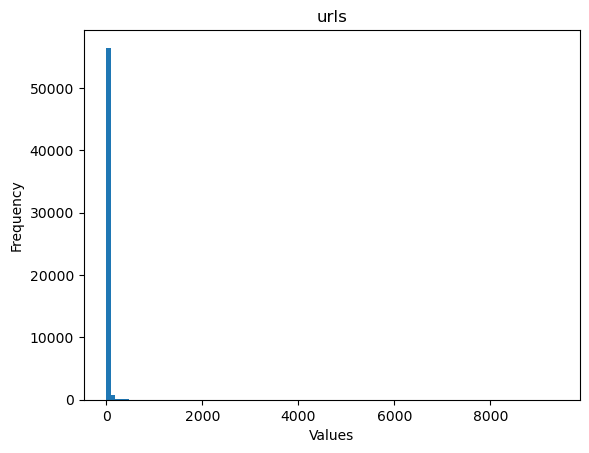

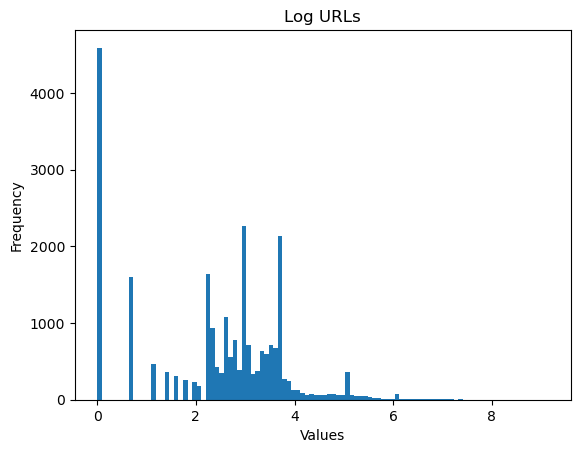

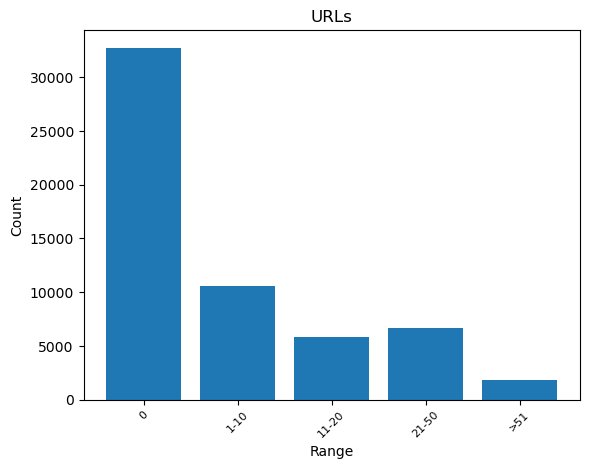

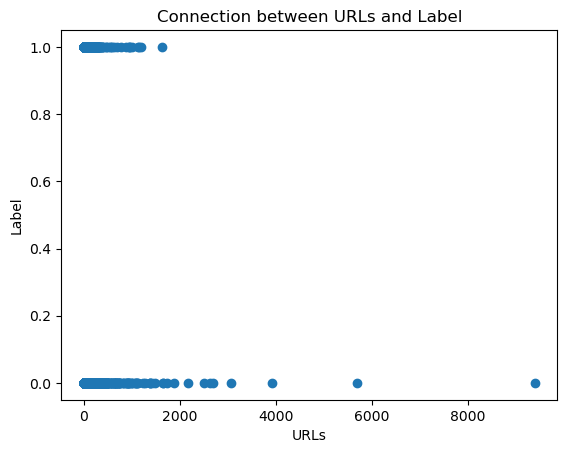

In [19]:
build_histogram(train_csv['urls'], 100, 'urls')

build_histogram(np.log(train_csv['urls'][train_csv['urls'] > 0]), 100, 'Log URLs')

bins = [-1, 0.9, 10, 20, 50, 9_000]
labels = ['0', '1-10', '11-20', '21-50', '>51']
train_csv['urls_range'] = pd.cut(train_csv['urls'], bins=bins, labels=labels)
counts = train_csv['urls_range'].value_counts().sort_index()
train_csv.drop('urls_range', axis=1, inplace = True)
plt.bar(counts.index, counts.values)
plt.title('URLs')
plt.xlabel('Range')
plt.xticks(rotation=45 , fontsize=8)
plt.ylabel('Count')
plot_size 
plt.show()

scatter_plot(train_csv['urls'], train_csv['label'], 'URLs', 'Label', 'Connection between URLs and Label')

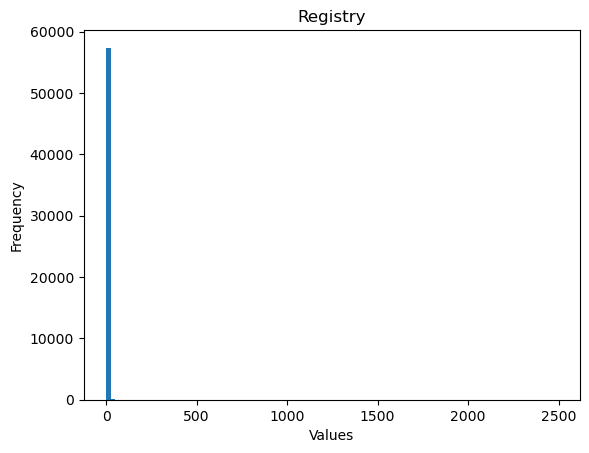

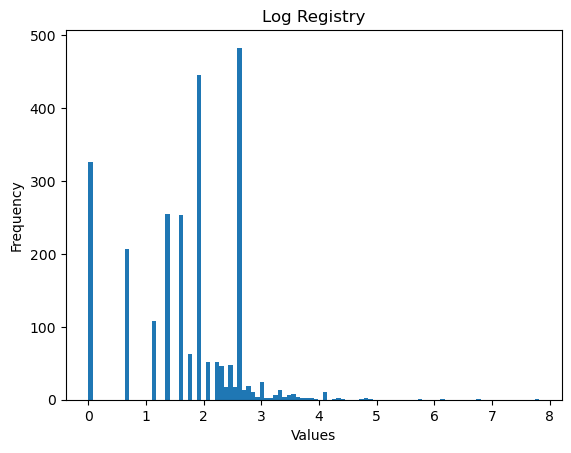

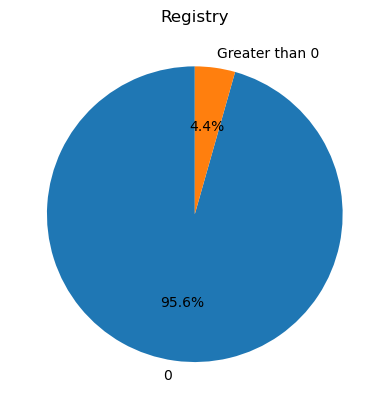

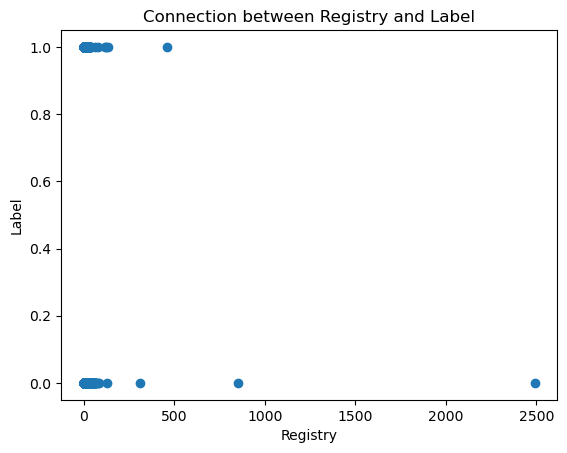

In [20]:
build_histogram(train_csv['registry'], 100, 'Registry')

build_histogram(np.log(train_csv['registry'][train_csv['registry'] > 0]), 100, 'Log Registry')

bins = [-1, 0.9, 3_000]
labels = ['0', 'Greater than 0']
train_csv['registry_range'] = pd.cut(train_csv['registry'], bins=bins, labels=labels)
counts = train_csv['registry_range'].value_counts().sort_index()
train_csv.drop('registry_range', axis=1, inplace = True)
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Registry')
plot_size 
plt.show()

scatter_plot(train_csv['registry'], train_csv['label'], 'Registry', 'Label', 'Connection between Registry and Label')

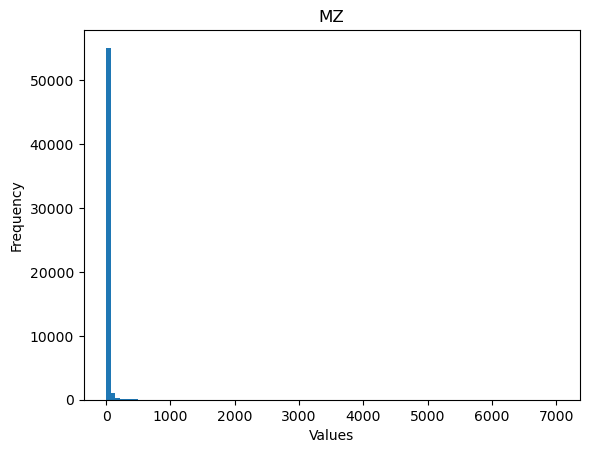

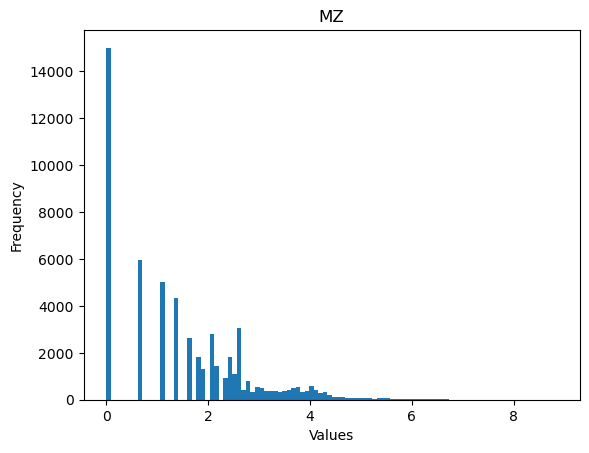

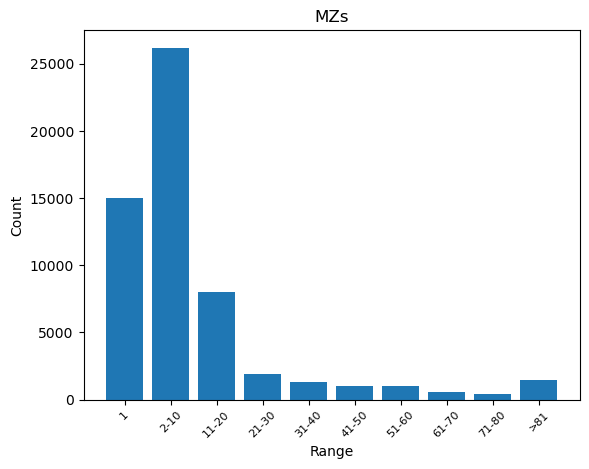

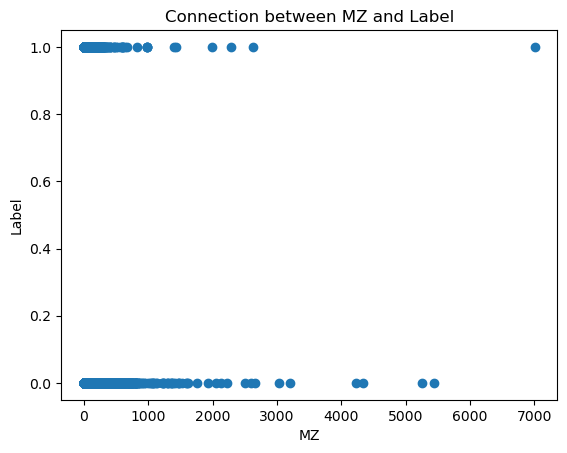

In [21]:
build_histogram(train_csv['MZ'], 100, 'MZ')

build_histogram(np.log(train_csv['MZ']), 100, 'MZ')

bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 7_500]
labels = ['1', '2-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>81']
train_csv['mz_range'] = pd.cut(train_csv['MZ'], bins=bins, labels=labels)
counts = train_csv['mz_range'].value_counts().sort_index()
train_csv.drop('mz_range', axis=1, inplace = True)
plt.bar(counts.index, counts.values)
plt.title('MZs')
plt.xlabel('Range')
plt.xticks(rotation=45 , fontsize=8)
plt.ylabel('Count')
plot_size 
plt.show()

scatter_plot(train_csv['MZ'], train_csv['label'], 'MZ', 'Label', 'Connection between MZ and Label')

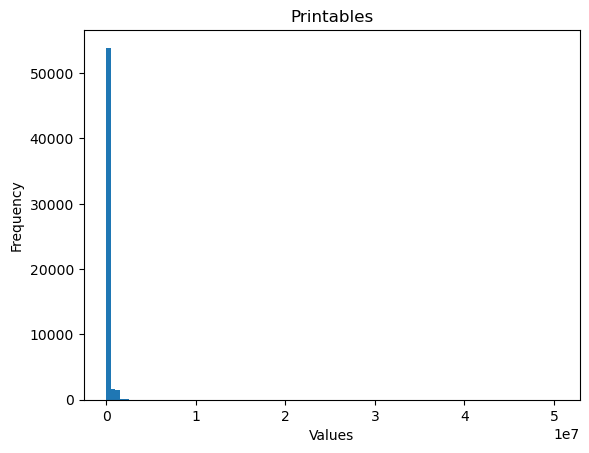

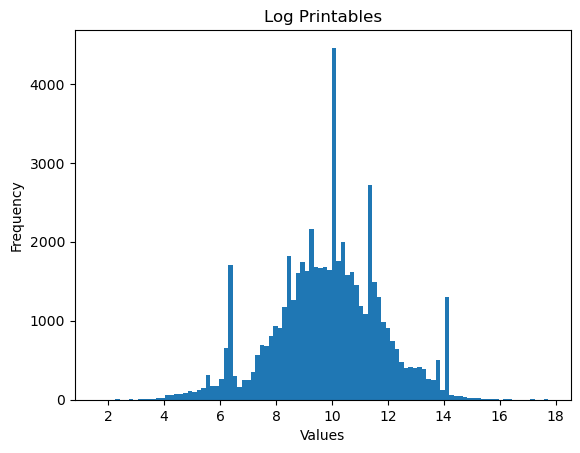

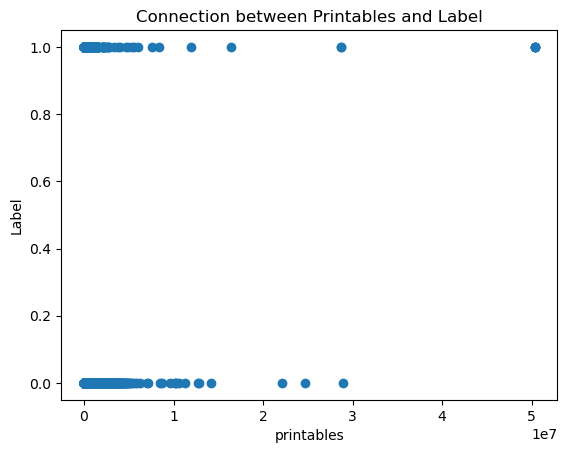

In [22]:
build_histogram(train_csv['printables'], 100, 'Printables')

build_histogram(np.log(train_csv['printables']), 100, 'Log Printables')

scatter_plot(train_csv['printables'], train_csv['label'], 'printables', 'Label', 'Connection between Printables and Label')

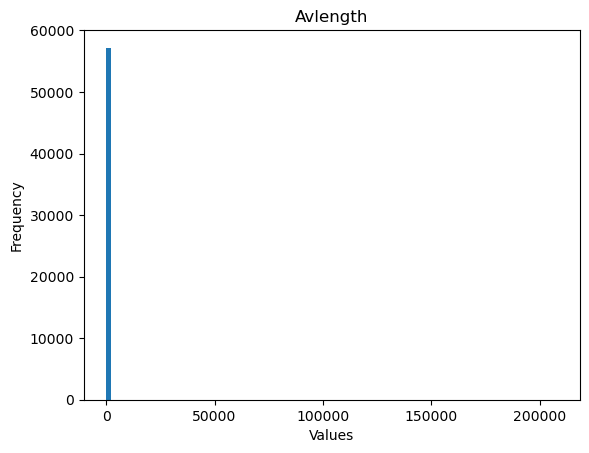

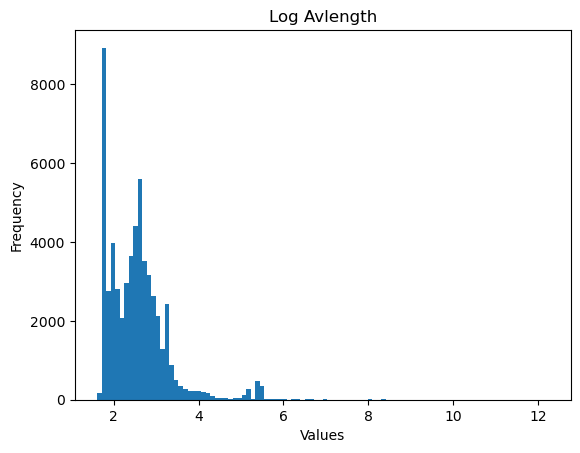

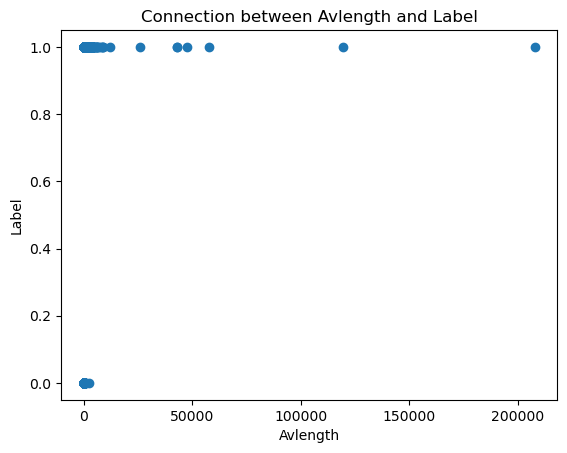

In [23]:
build_histogram(train_csv['avlength'], 100, 'Avlength')

build_histogram(np.log(train_csv['avlength']), 100, 'Log Avlength')

scatter_plot(train_csv['avlength'], train_csv['label'], 'Avlength', 'Label', 'Connection between Avlength and Label')

In [24]:
train_csv['file_type_trid'].value_counts()

Win64 Executable (generic)                   10085
Win32 Executable MS Visual C++ (generic)      8967
Win32 Executable (generic)                    8781
Win32 Dynamic Link Library (generic)          4010
Generic CIL Executable (.NET, Mono, etc.)     3804
                                             ...  
MS Flight Simulator Gauge                        1
Photoshop filter plug-in                         1
VirtualDub Filter Plug-in                        1
GIMP Plugin (Win)                                1
WinArchiver Mountable compressed Archive         1
Name: file_type_trid, Length: 89, dtype: int64

In [25]:
train_csv['file_type_trid'].value_counts().head(10)

Win64 Executable (generic)                   10085
Win32 Executable MS Visual C++ (generic)      8967
Win32 Executable (generic)                    8781
Win32 Dynamic Link Library (generic)          4010
Generic CIL Executable (.NET, Mono, etc.)     3804
Windows Control Panel Item (generic)          3208
InstallShield setup                           2217
UPX compressed Win32 Executable               2203
DOS Executable Generic                        1724
Win32 Executable Microsoft Visual Basic 6     1669
Name: file_type_trid, dtype: int64

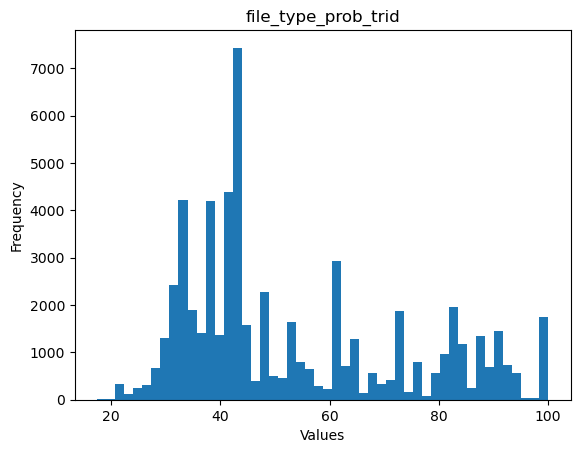

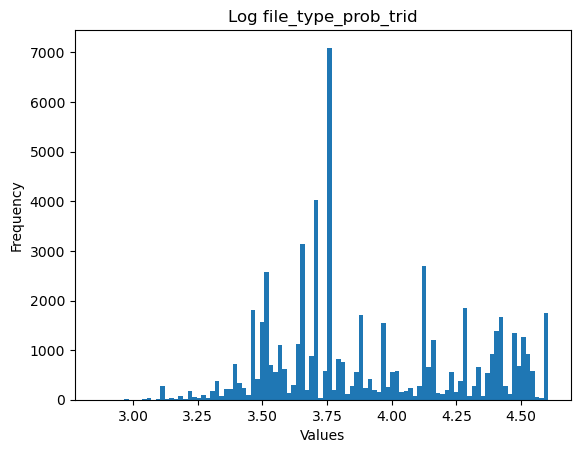

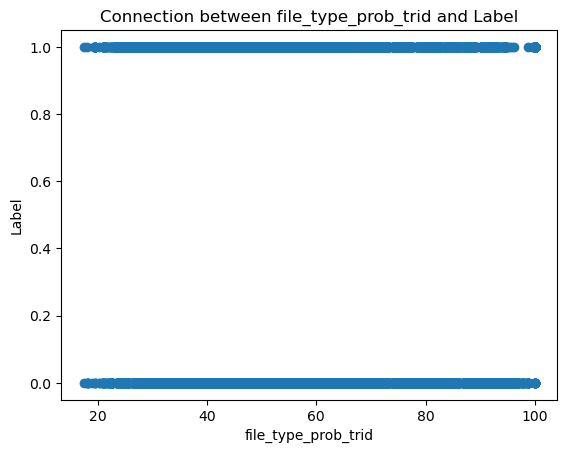

In [26]:
build_histogram(train_csv['file_type_prob_trid'], 50, 'file_type_prob_trid')

build_histogram(np.log(train_csv['file_type_prob_trid']), 100, 'Log file_type_prob_trid')

scatter_plot(train_csv['file_type_prob_trid'], train_csv['label'], 'file_type_prob_trid', 'Label', 'Connection between file_type_prob_trid and Label')

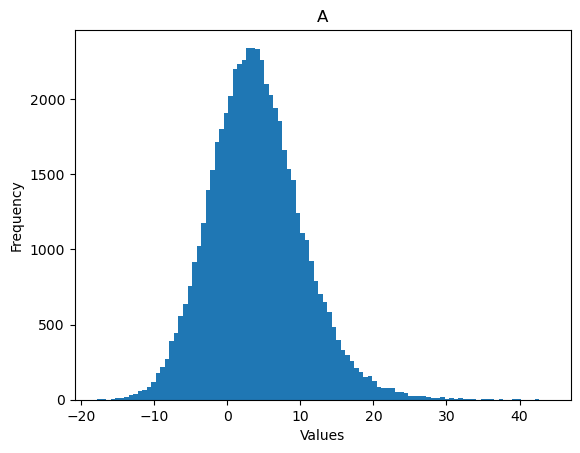

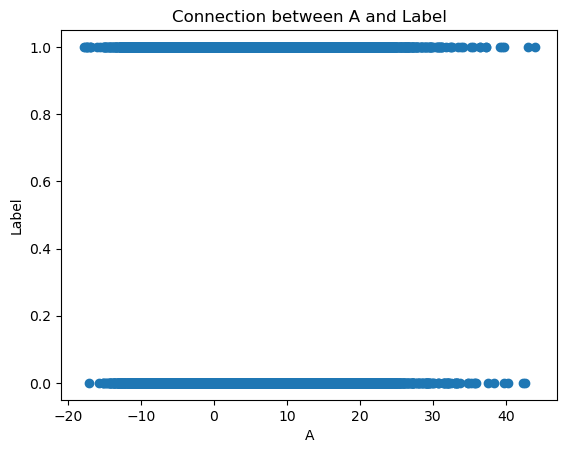

In [27]:
build_histogram(train_csv['A'], 100, 'A')

scatter_plot(train_csv['A'], train_csv['label'], 'A', 'Label', 'Connection between A and Label')

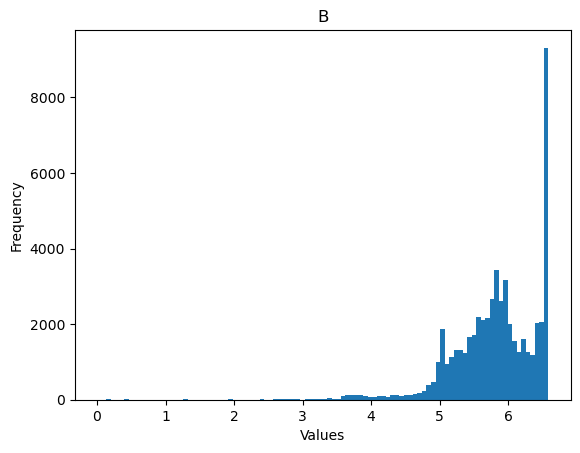

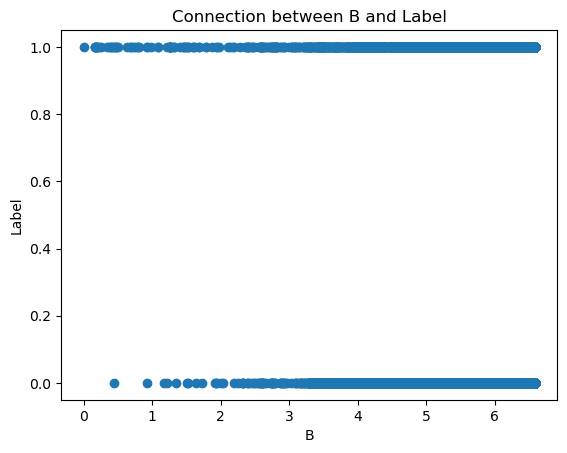

In [28]:
build_histogram(train_csv['B'], 100, 'B')

scatter_plot(train_csv['B'], train_csv['label'], 'B', 'Label', 'Connection between B and Label')

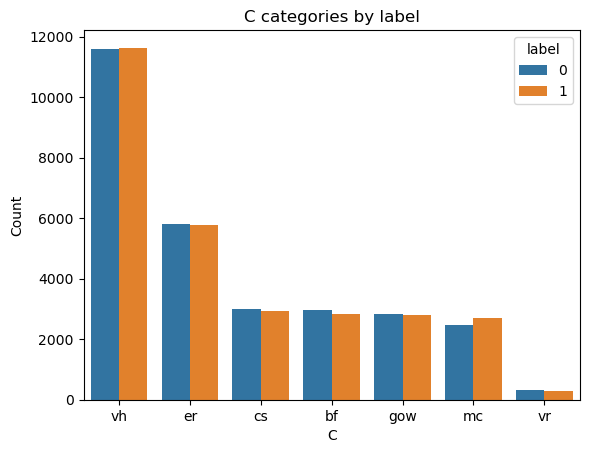

In [29]:
# Calculate the counts of each category in 'C'
category_counts = train_csv['C'].value_counts()

# Sort the categories in descending order
sorted_categories = category_counts.index.tolist()

# Create a count plot with sorted categories
sns.countplot(x='C', hue='label', data=train_csv, order=sorted_categories)
plt.xlabel('C')
plt.ylabel('Count')
plt.title('C categories by label')
plot_size 
plt.show()

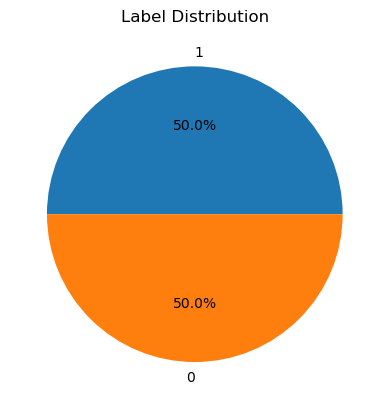

In [30]:
counts = train_csv['label'].value_counts()

fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Label Distribution')
plt.show()

In [31]:
def generate_correlation_heatmap(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

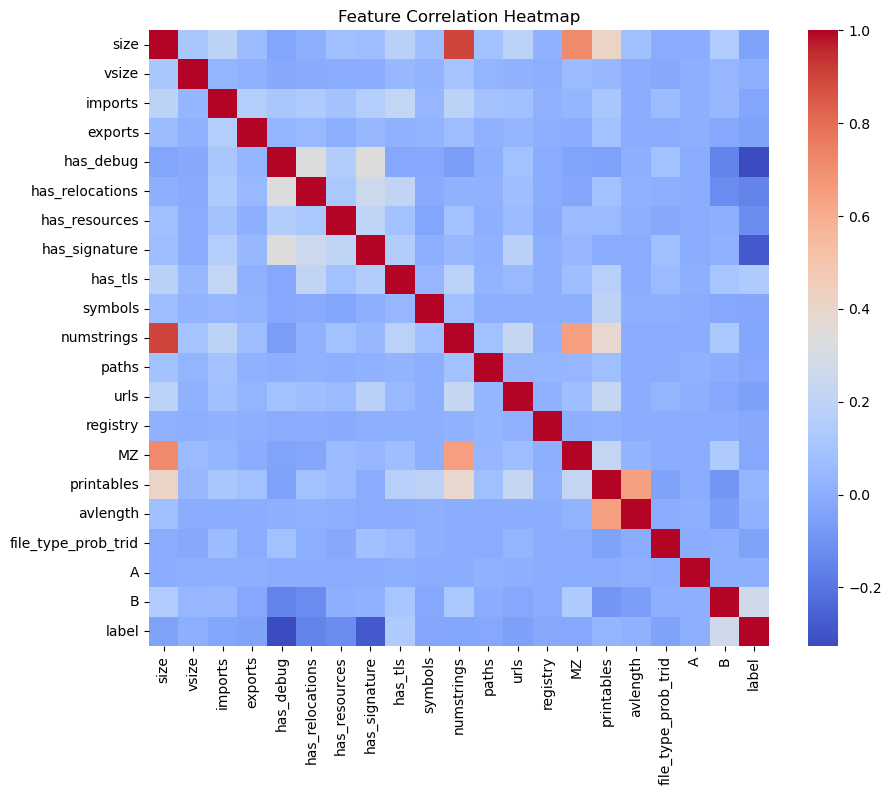

In [32]:
 generate_correlation_heatmap(train_csv)

we see that numstrings - size have a strong correlation. Let's check which is more correlated to the label

## Part 2

In [33]:
train_copy = train_csv.copy()

We've decided to drop the anonymous feature 'C' since its unique values distribute almost evenly between '1' and '0'. <br>
We suspect it won't be valuable for the classification and will unnecessarily increase the complexity of our prediction models. 

In [34]:
train_copy = train_copy.drop('C', axis=1) 

Here we create a copy of train before we split it to validation, in order to save the integrity of the original data.

In [35]:
train_copy_shuf = train_copy.copy()
train_copy_shuf = train_copy_shuf.sample(frac=1, random_state=42)

In [36]:
value_counts = train_copy_shuf['file_type_trid'].value_counts()
print(value_counts)

Win64 Executable (generic)                   10085
Win32 Executable MS Visual C++ (generic)      8967
Win32 Executable (generic)                    8781
Win32 Dynamic Link Library (generic)          4010
Generic CIL Executable (.NET, Mono, etc.)     3804
                                             ...  
VirtualDub Filter Plug-in                        1
GIMP Plugin (Win)                                1
Photoshop filter plug-in                         1
Microsoft CLR native image executable            1
foobar 2000 generic component                    1
Name: file_type_trid, Length: 89, dtype: int64


In [37]:
value_counts = train_copy_shuf['file_type_trid'].value_counts().head(10)
print(value_counts)

Win64 Executable (generic)                   10085
Win32 Executable MS Visual C++ (generic)      8967
Win32 Executable (generic)                    8781
Win32 Dynamic Link Library (generic)          4010
Generic CIL Executable (.NET, Mono, etc.)     3804
Windows Control Panel Item (generic)          3208
InstallShield setup                           2217
UPX compressed Win32 Executable               2203
DOS Executable Generic                        1724
Win32 Executable Microsoft Visual Basic 6     1669
Name: file_type_trid, dtype: int64


In [38]:
top_3_values = train_copy_shuf['file_type_trid'].value_counts().nlargest(3).index

We decided to get the top 3 common 'file_type_trid' values since they have significantly more occurrences compared to the following. Considering that, it's reasonable to assume that Test set will have the same 'file_type_trid' values as top 3. 

In [39]:
encoder = OneHotEncoder(sparse=False)

categorical_data = train_copy_shuf['file_type_trid'].values.reshape(-1, 1)
encoded_data = encoder.fit_transform(categorical_data)

column_names = encoder.get_feature_names(['file_type_trid'])

train_copy_shuf = train_copy_shuf.drop('file_type_trid', axis=1)
train_copy_shuf = pd.concat([train_copy_shuf, pd.DataFrame(encoded_data, columns=column_names)], axis=1)

label_column = train_copy_shuf['label'] 
train_copy_shuf = train_copy_shuf.drop('label', axis=1) 
train_copy_shuf['label'] = label_column

In [40]:
columns_to_delete = [col for col in train_copy_shuf.columns if col.startswith('file_type_trid_') and col.split('_')[-1] not in top_3_values]
train_copy_shuf.drop(columns_to_delete, axis=1, inplace=True)

In [41]:
pd.options.display.float_format = '{:.2f}'.format
train_copy_shuf.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,...,MZ,printables,avlength,file_type_prob_trid,A,B,file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win64 Executable (generic),label
count,60000.00,58065.00,58261.00,57907.00,57073.00,56676.00,58039.00,58063.00,57102.00,57344.00,...,56911.00,57261.00,57243.00,60000.00,56296.00,56249.00,60000.00,60000.00,60000.00,60000.00
mean,1501019.14,1965704.26,106.20,30.80,0.40,0.54,0.86,0.25,0.23,40.17,...,16.26,120771.03,32.66,53.68,4.02,5.81,0.15,0.15,0.17,0.50
std,4727390.68,20178814.65,213.45,508.08,0.49,0.50,0.35,0.44,0.42,1239.70,...,82.19,605220.32,1094.71,20.63,6.37,0.64,0.35,0.36,0.37,0.50
min,298.00,544.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,5.00,5.00,17.50,-17.78,0.00,0.00,0.00,0.00,0.00
25%,107008.00,122880.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,6013.00,7.45,38.40,-0.29,5.47,0.00,0.00,0.00,0.00
50%,483328.00,421888.00,28.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,4.00,22835.00,12.01,43.30,3.66,5.86,0.00,0.00,0.00,0.50
75%,1239326.00,1601536.00,152.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,...,11.00,76156.00,17.31,69.10,7.86,6.34,0.00,0.00,0.00,1.00
max,325353693.00,4278288384.00,15047.00,48840.00,1.00,1.00,1.00,1.00,1.00,181660.00,...,7010.00,50346873.00,207990.93,100.00,43.93,6.58,1.00,1.00,1.00,1.00


In [42]:
train_copy_shuf.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,MZ,printables,avlength,file_type_prob_trid,A,B,file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win64 Executable (generic),label
12628,c34210db67441d1f88e3a07d09aa9a6d8a108643f9b6f3...,402944,495616.00,73.00,95.00,0.00,1.00,1.00,0.00,0.00,...,NaN,23685.00,7.71,41.00,6.56,6.09,0.00,0.00,0.00,1
37730,45234986544de389028c52a2a1fe05ed3736937a94eab8...,3169240,3203072.00,311.00,0.00,1.00,1.00,1.00,1.00,NaN,...,194.00,1288663.00,151.73,88.30,NaN,6.19,0.00,0.00,0.00,0
39991,bc8508f305c865ffa73b6913a552ccd8b47e864252ea51...,9778,40960.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,566.00,7.45,100.00,0.11,5.96,0.00,0.00,0.00,1
8525,136344b9ed4c349a325a1476b7ced049856c3b35a8c8e5...,366976,385024.00,69.00,76.00,1.00,1.00,1.00,1.00,0.00,...,1.00,NaN,9.51,63.50,4.56,5.65,0.00,0.00,0.00,0
8279,0fdb4e0f5426acff80dc6cee700c4f3b079b004d8a31fa...,396760,413696.00,140.00,0.00,1.00,1.00,1.00,1.00,1.00,...,4.00,18488.00,12.52,40.30,3.36,6.05,0.00,0.00,0.00,0


In [43]:
missing_values = train_copy_shuf.isnull().sum()
missing_values

sha256                                                        0
size                                                          0
vsize                                                      1935
imports                                                    1739
exports                                                    2093
has_debug                                                  2927
has_relocations                                            3324
has_resources                                              1961
has_signature                                              1937
has_tls                                                    2898
symbols                                                    2656
numstrings                                                 2718
paths                                                      3660
urls                                                       2349
registry                                                   2525
MZ                                      

Separate to Train and Validation 

In [44]:
validation_proportion = 0.2 
train_df, validation_df = train_test_split(train_copy_shuf, test_size=validation_proportion, random_state=42) 

#### Initating the preprocessing on the training set

Fill missing values:

We divided our columns into groups, based on their distribution and values. For columns that exhibited a smooth numerical progression and had a wide range of values, ranging from zero to over a million, we imputed the missing values with the mean of their respective column (i.e., the nulls of the column ‘vsize’ received the mean of ‘vsize’). The columns that got this treatment were: ‘vsize’, ‘imports’, ‘exports’, ‘numstrings’, ‘MZ’, ‘printables’, ‘avlength’, ‘A’, ‘B’.

For the other columns, we used the K-Nearest Neighbours (KNN) method, which fills null values by estimating them based on the values of their nearest neighbours in the feature space. The columns that had their nulls filled with KNN were: ‘has_debug’, ‘has_relocations’, ‘has_resources’, ‘has_signature’, ‘has_tls’, ‘symbols’, ‘paths’, ‘urls’, ‘registry’. 
We chose the universal hyperparameter for distance calculation which is euclidean. 
We also chose neighbours=5 because it must be odd, and we believe the number is reasonable since a larger number may introduce more smoothing and potentially lose some local patterns.

In [45]:
def fit_imputer_mean(data, column):
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)
    return mean_value

In [46]:
imputer_vsize = fit_imputer_mean(train_df, 'vsize')
imputer_imports = fit_imputer_mean(train_df, 'imports')
imputer_exports = fit_imputer_mean(train_df, 'exports')
imputer_numstrings = fit_imputer_mean(train_df, 'numstrings')
imputer_MZ = fit_imputer_mean(train_df, 'MZ')
imputer_printables = fit_imputer_mean(train_df, 'printables')
imputer_avlength = fit_imputer_mean(train_df, 'avlength')
imputer_A = fit_imputer_mean(train_df, 'A')
imputer_B = fit_imputer_mean(train_df, 'B')

In [47]:
def fit_imputer_knn(train_data, column): 
    imputer = KNNImputer(n_neighbors=5)
    column_data = train_data[column].values.reshape(-1, 1)
    imputer.fit(column_data)
    train_data[column] = imputer.transform(column_data)
    return imputer

In [48]:
imputer_has_debug = fit_imputer_knn(train_df, 'has_debug')
imputer_has_relocations = fit_imputer_knn(train_df, 'has_relocations')
imputer_has_resources = fit_imputer_knn(train_df, 'has_resources')
imputer_has_signature = fit_imputer_knn(train_df, 'has_signature')
imputer_has_tls = fit_imputer_knn(train_df, 'has_tls')
imputer_symbols = fit_imputer_knn(train_df, 'symbols')
imputer_urls = fit_imputer_knn(train_df, 'urls')
imputer_paths = fit_imputer_knn(train_df, 'paths')
imputer_registry = fit_imputer_knn(train_df, 'registry')

Here we check if all the missing values are filled

In [49]:
missing_values = train_df.isnull().sum()
missing_values

sha256                                                     0
size                                                       0
vsize                                                      0
imports                                                    0
exports                                                    0
has_debug                                                  0
has_relocations                                            0
has_resources                                              0
has_signature                                              0
has_tls                                                    0
symbols                                                    0
numstrings                                                 0
paths                                                      0
urls                                                       0
registry                                                   0
MZ                                                         0
printables              

We began by doing the log function on the columns: ‘size‘, ‘vsize‘, ‘imports’, ‘exports‘, ‘numstrings‘, ‘printables‘. In the columns ‘imports’ and ‘exports’, we specifically applied the log transformation on the values which were bigger than zero. 

In [50]:
train_df['size'] = np.log(train_df['size'])
train_df['vsize'] = np.log(train_df['vsize'])
train_df['imports'] = np.where(train_df['imports'] > 0, np.log(train_df['imports']), 0)
train_df['exports'] = np.where(train_df['exports'] > 0, np.log(train_df['exports']), 0)
train_df['numstrings'] = np.log(train_df['numstrings'])
train_df['printables'] = np.log(train_df['printables'])

Here we create our new feature, ‘vsize_diff’, which is the difference between vsize and size. We deliberately added it to our train data so it would be positioned as the third column, following vsize. <br>
We suspect that corrupted files have a significant difference.

In [51]:
train_df['vsize_diff'] = (train_df['vsize'] - train_df['size']).abs()
train_df.insert(3, 'vsize_diff', train_df.pop('vsize_diff'))

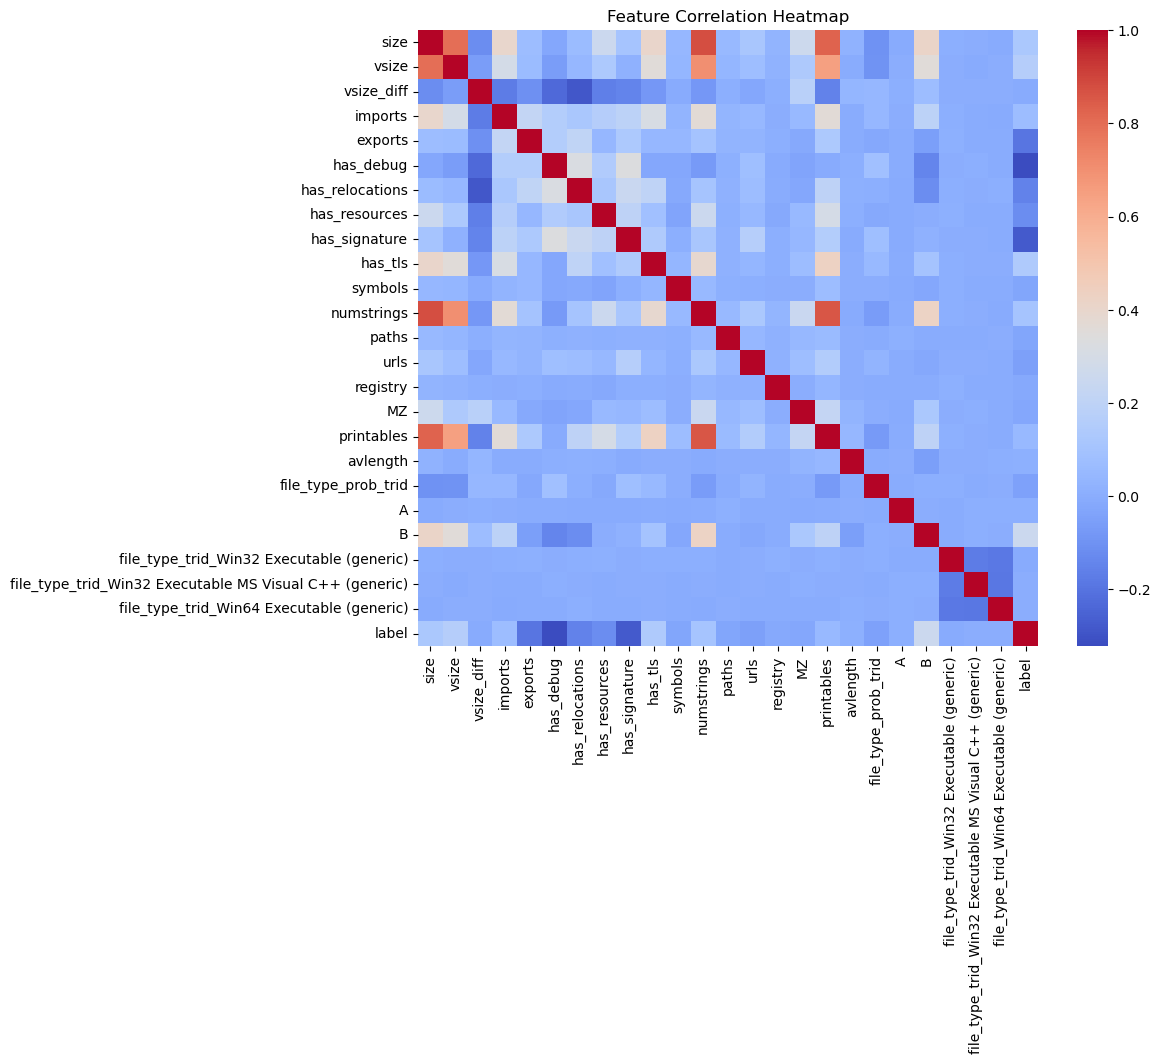

In [52]:
 generate_correlation_heatmap(train_df)

We see that size and vsize are highly correlated with numstrings, printables and each other. <br>
It may cause overfitting and unnecessary model complexity, so our resolution was to omit the two of them.

In [53]:
train_df.drop(['size', 'vsize'], axis=1, inplace=True)

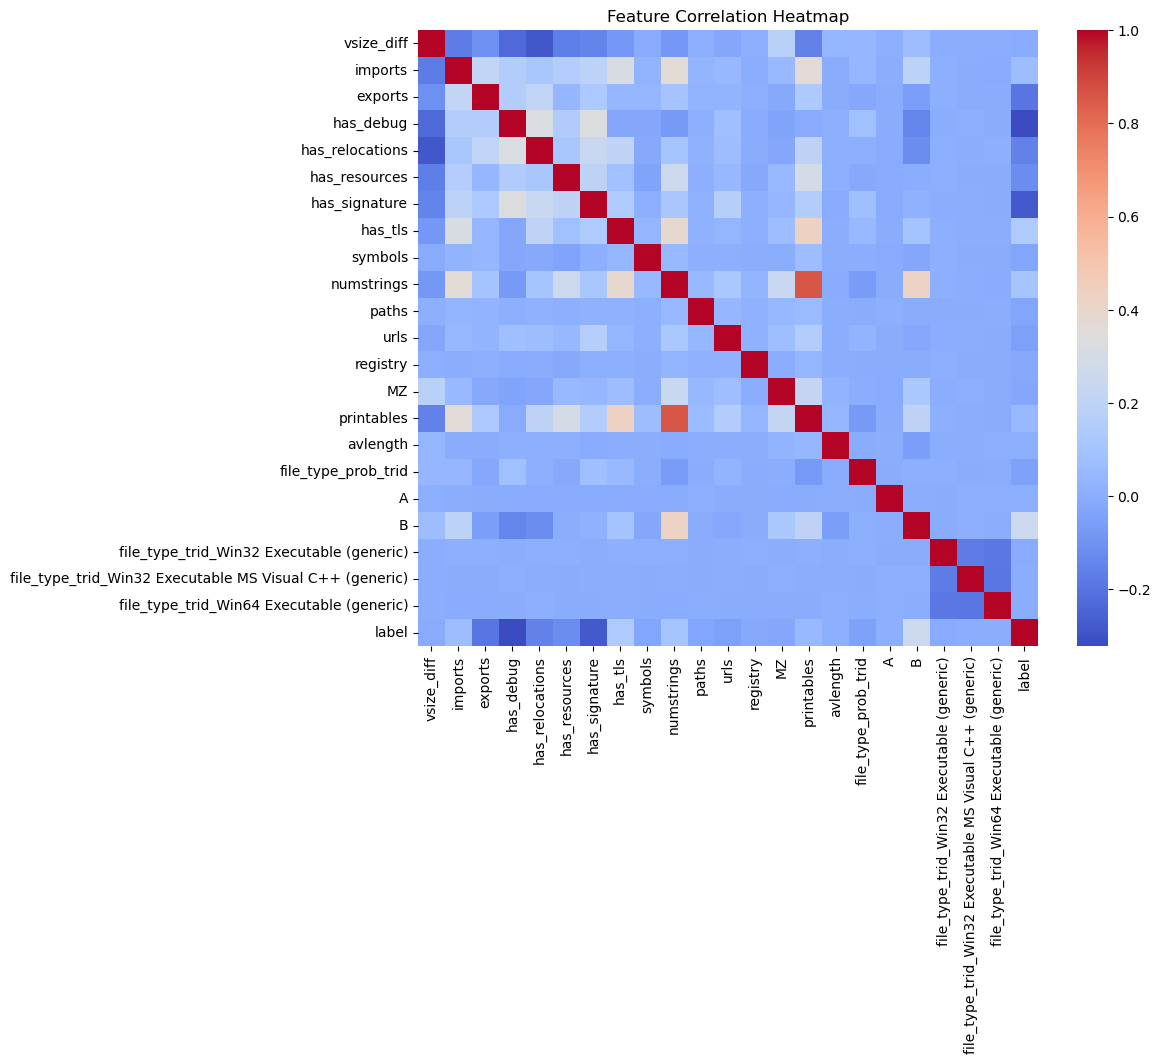

In [54]:
generate_correlation_heatmap(train_df)

In [55]:
pd.options.display.float_format = '{:.2f}'.format
train_df.describe()

,vsize_diff,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,...,MZ,printables,avlength,file_type_prob_trid,A,B,file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win64 Executable (generic),label
count,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,...,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00
mean,0.66,3.02,0.43,0.40,0.54,0.86,0.25,0.23,33.88,7.40,...,16.37,9.96,32.01,53.61,4.03,5.81,0.15,0.15,0.17,0.50
std,1.01,2.25,1.24,0.48,0.48,0.34,0.43,0.41,931.74,1.94,...,80.84,1.97,1044.25,20.58,6.18,0.62,0.35,0.36,0.37,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.61,5.00,17.50,-17.69,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,6.20,...,1.00,8.79,7.45,38.40,0.01,5.51,0.00,0.00,0.00,0.00
50%,0.17,3.64,0.00,0.00,1.00,1.00,0.00,0.00,0.00,7.73,...,4.00,10.04,12.50,43.30,4.03,5.83,0.00,0.00,0.00,1.00
75%,0.90,4.98,0.00,1.00,1.00,1.00,0.25,0.23,0.00,8.72,...,14.00,11.32,18.67,69.00,7.53,6.30,0.00,0.00,0.00,1.00
max,11.50,9.62,10.80,1.00,1.00,1.00,1.00,1.00,91053.00,14.27,...,7010.00,17.73,207990.93,100.00,43.93,6.58,1.00,1.00,1.00,1.00


Here we deal with outliers

As said, 'A' seems to distribute normally so we chose to detect ouliers using a Z-score threshold,even though it was not mentioned in the course materials. <br> 
The score measures how many standard deviations an individual data point is from the mean. <br>
By setting the threshold to 2.8, we are considering data points that fall more than 2.8 sd away from the mean as outliers.<br>
We tried to set other threshold and found that 2.8 gives us the best predictions prefomences.

In [56]:
def fit_outliers_z_score(data, column, threshold):
    column_mean = data[column].mean()
    column_std = data[column].std()
    z_scores = (data[column] - column_mean) / column_std
    outliers = np.abs(z_scores) > threshold
    num_outliers_replaced = np.sum(outliers)
    data.loc[outliers, column] = column_mean
    print(f"Number of outliers replaced in train data: {num_outliers_replaced}")
    return column_mean, column_std

In [57]:
imputer_A_mean, imputer_A_std = fit_outliers_z_score(train_df, 'A', 2.8)

Number of outliers replaced in train data: 524


In [58]:
def fit_outliers_isolation_forest(train_data, column):
    imputer = IsolationForest(n_estimators=100, max_samples='auto',
                              contamination='auto', max_features=1.0,
                              bootstrap=False)
    column_data = train_data[column].values.reshape(-1, 1)
    imputer.fit(column_data)
    outliers = imputer.predict(column_data)
    mean_values = train_data.loc[outliers != -1, column].mean()
    train_data.loc[outliers == -1, column] = mean_values
    return imputer

In [59]:
outlier_imputer_registry = fit_outliers_isolation_forest(train_df, 'registry')
outlier_imputer_urls = fit_outliers_isolation_forest(train_df, 'urls')
outlier_imputer_B = fit_outliers_isolation_forest(train_df, 'B')
outlier_imputer_exports = fit_outliers_isolation_forest(train_df, 'exports')
outlier_imputer_imports = fit_outliers_isolation_forest(train_df, 'imports')
outlier_imputer_vsize_diff = fit_outliers_isolation_forest(train_df, 'vsize_diff')

Using tools we haven't learned:

We learned about dropping outliers and not about replacing them. In reality, our Test set may also have outliers, from documenations error for example. We can't just disregard the samples. Instead of getting too-biased predictions for samples with outliers, we transformed them (deleted and then imputed) with data that was fitted on the Train set.  

Dimensionality:

We noticed that our data contains many dimensions, and this is not a good thing due to several reasons. Working with data in high-dimensional spaces leads to increased complexity, where the model becomes too closely fitted to the training data. Moreover, it can disrupt the bias-variance trade-off. The more dimensions we have, the higher the variance is and the lower the bias is. This is not good as it leads to overfitting and low model flexibility. We want to keep our bias-variance trade-off balanced. 

High dimensionality can be recognized by several ways: too long runtime when activating ML models; and struggle to achieve the satisfactory AUC of 0.9, probably beacuse of overfitting.
<br>
At first, We've decided to drop the anonymous feature 'C' since its unique values distribute almost evenly between '1' and '0'. We suspect it won't be valuable for the classification and will unnecessarily increase the complexity of our prediction models.
<br>
Later, our correlation heatmaps showed that 'size' and  'vsize' features have a high correlation which indicated that there is some redundancy in the data. 

Conduct PCA

Number of components for 95% variance: 18


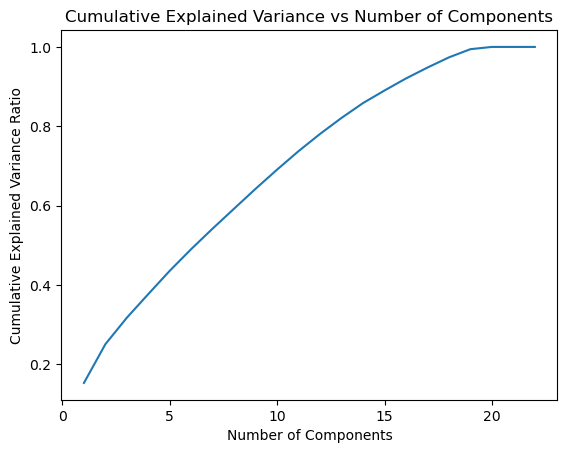

In [60]:
pca_columns = train_df.columns[1:-1]

numerical_columns = pca_columns.tolist()

#standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_df[numerical_columns])

pca = PCA()
data_pca = pca.fit_transform(data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components for 95% variance:", n_components)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()

The analysis shows that we can keep 18 particle components as new features. 
<br>
The components are a linear combination of the explicit features. We've decided not using the new components since they don't exhibit an improvement on our best predicting model, and they lose the meaning of the given features.    

We've also conducted forward selection on our features by using Mallows Cp:

In [61]:
selected_columns = train_df.columns[1:-1]
X_train = train_df[selected_columns].values
y_train = train_df['label'].values

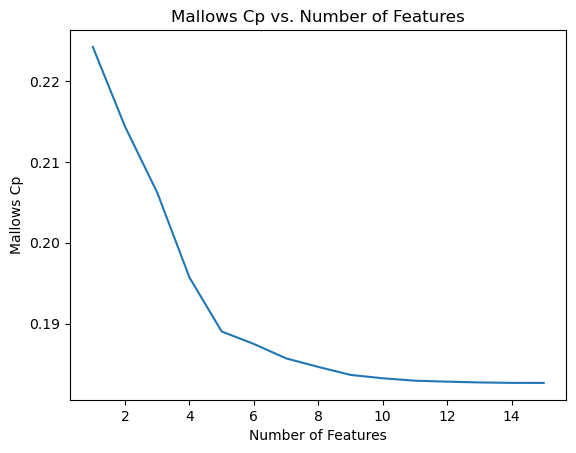

Selected features:
- has_debug
- B
- has_signature
- urls
- imports
- vsize_diff
- has_tls
- has_resources
- file_type_prob_trid
- MZ
- symbols
- printables
- paths
- avlength
- has_relocations

Number of Selected features: 15

Discarded features:
- exports
- numstrings
- registry
- A
- file_type_trid_Win32 Executable (generic)
- file_type_trid_Win32 Executable MS Visual C++ (generic)
- file_type_trid_Win64 Executable (generic)


In [62]:
def calculate_mallows_cp(X, y, selected_features):
    model = LinearRegression()
    model.fit(X[:, selected_features], y)
    y_pred = model.predict(X[:, selected_features])
    mse = mean_squared_error(y, y_pred)
    num_features = len(selected_features)
    n = X.shape[0]
    cp_score = mse + 2 * num_features * mse / (n - num_features - 1)
    return cp_score

def forward_selection(X, y, feature_names):
    n_features = X.shape[1]
    selected_features = []
    remaining_features = list(range(n_features))
    best_cp_score = float('inf')
    cp_scores = []

    while remaining_features:
        best_feature = None
        for feature in remaining_features:
            cp_score = calculate_mallows_cp(X, y, selected_features + [feature])
            if cp_score < best_cp_score:
                best_cp_score = cp_score
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            cp_scores.append(best_cp_score)
        else:
            break

    selected_feature_names = [feature_names[i] for i in selected_features]
    discarded_feature_names = [feature_names[i] for i in remaining_features]
    return selected_feature_names, discarded_feature_names, cp_scores

selected_features, discarded_features, cp_scores = forward_selection(X_train, y_train, selected_columns)

plt.plot(range(1, len(selected_features) + 1), cp_scores)
plt.xlabel('Number of Features')
plt.ylabel('Mallows Cp')
plt.title('Mallows Cp vs. Number of Features')
plt.show()

print("Selected features:")
for feature in selected_features:
   print(f"- {feature}")
print(f"\nNumber of Selected features: {len(selected_features)}")
print("\nDiscarded features:")
for feature in discarded_features:
   print(f"- {feature}")

After conducting the forward selection by using Mallows's Cp overfitting, we've decided to keep 19 features. <br> 
It's a greedy algorithm, and does not check all of the possible feature combinations. <br> 
We first dropped all of the proposed features and saw a decrease in the models preformences. <br> 
We tried omitting  some other combinations from the list above and found that dropping noly the three one-hot-encoded 'file_type_trid' yields us the best performances.

In [63]:
files_to_drop = ['file_type_trid_Win32 Executable (generic)', 'file_type_trid_Win32 Executable MS Visual C++ (generic)', 'file_type_trid_Win64 Executable (generic)']
train_df.drop(files_to_drop, axis=1, inplace=True)

#### Initating the preprocessing on the Validation set

Fill with mean

In [64]:
def transform_imputer_mean(data, imputer, column):
    data[column].fillna(imputer, inplace=True)

In [65]:
transform_imputer_mean(validation_df, imputer_vsize, 'vsize')
transform_imputer_mean(validation_df, imputer_imports, 'imports')
transform_imputer_mean(validation_df, imputer_exports, 'exports')
transform_imputer_mean(validation_df, imputer_numstrings, 'numstrings')
transform_imputer_mean(validation_df, imputer_MZ, 'MZ')
transform_imputer_mean(validation_df, imputer_printables, 'printables')
transform_imputer_mean(validation_df, imputer_avlength, 'avlength')
transform_imputer_mean(validation_df, imputer_A, 'A')
transform_imputer_mean(validation_df, imputer_B, 'B')

Fill with KNN

In [66]:
def transform_imputer_knn(data, imputer, column):
    data[column] = imputer.transform(data[column].values.reshape(-1, 1))

In [67]:
transform_imputer_knn(validation_df, imputer_has_debug, 'has_debug')
transform_imputer_knn(validation_df, imputer_has_relocations, 'has_relocations')
transform_imputer_knn(validation_df, imputer_has_resources, 'has_resources')
transform_imputer_knn(validation_df, imputer_has_signature, 'has_signature')
transform_imputer_knn(validation_df, imputer_has_tls, 'has_tls')
transform_imputer_knn(validation_df, imputer_symbols, 'symbols')
transform_imputer_knn(validation_df, imputer_urls, 'urls')
transform_imputer_knn(validation_df, imputer_paths,'paths')
transform_imputer_knn(validation_df, imputer_registry,'registry')

In [68]:
missing_values = validation_df.isnull().sum()
missing_values

sha256                                                     0
size                                                       0
vsize                                                      0
imports                                                    0
exports                                                    0
has_debug                                                  0
has_relocations                                            0
has_resources                                              0
has_signature                                              0
has_tls                                                    0
symbols                                                    0
numstrings                                                 0
paths                                                      0
urls                                                       0
registry                                                   0
MZ                                                         0
printables              

Log transformation

In [69]:
validation_df['size'] = np.log(validation_df['size'])
validation_df['vsize'] = np.log(validation_df['vsize'])
validation_df['imports'] = np.where(validation_df['imports'] > 0, np.log(validation_df['imports']), 0)
validation_df['exports'] = np.where(validation_df['exports'] > 0, np.log(validation_df['exports']), 0)
validation_df['numstrings'] = np.log(validation_df['numstrings'])
validation_df['printables'] = np.log(validation_df['printables'])

New Feature

In [70]:
validation_df['vsize_diff'] = (validation_df['vsize'] - validation_df['size']).abs()
validation_df.insert(3, 'vsize_diff', validation_df.pop('vsize_diff'))

Delete size and vsize

In [71]:
validation_df.drop(['size', 'vsize'], axis=1, inplace=True)

In [72]:
pd.options.display.float_format = '{:.2f}'.format
validation_df.describe()

,vsize_diff,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,...,MZ,printables,avlength,file_type_prob_trid,A,B,file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win64 Executable (generic),label
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,...,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.66,3.04,0.45,0.41,0.54,0.86,0.25,0.24,63.95,7.42,...,15.86,9.97,35.11,53.94,3.96,5.81,0.15,0.15,0.17,0.50
std,1.01,2.26,1.28,0.48,0.48,0.34,0.43,0.42,1967.51,1.94,...,76.80,1.97,1164.01,20.86,6.11,0.61,0.35,0.35,0.37,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,2.40,5.06,18.30,-17.78,0.48,0.00,0.00,0.00,0.00
25%,0.02,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,6.21,...,2.00,8.78,7.45,38.40,-0.02,5.50,0.00,0.00,0.00,0.00
50%,0.17,3.71,0.00,0.00,1.00,1.00,0.00,0.00,0.00,7.79,...,4.00,10.04,12.38,44.20,4.03,5.83,0.00,0.00,0.00,0.00
75%,0.90,5.00,0.00,1.00,1.00,1.00,0.25,0.23,0.00,8.72,...,14.00,11.32,18.42,71.10,7.47,6.31,0.00,0.00,0.00,1.00
max,8.72,9.60,10.50,1.00,1.00,1.00,1.00,1.00,181660.00,14.05,...,4232.00,17.73,119580.65,100.00,42.94,6.58,1.00,1.00,1.00,1.00


Outlier detection

In [73]:
def transform_outliers_z_score(data, column, threshold, mean, std):
    z_scores = (data[column] - mean) / std
    outliers = np.abs(z_scores) > threshold
    num_outliers_replaced = np.sum(outliers)
    data.loc[outliers, column] = mean
    print(f"Number of outliers replaced in test data: {num_outliers_replaced}")

In [74]:
transform_outliers_z_score(validation_df, 'A', 2.8, imputer_A_mean, imputer_A_std)

Number of outliers replaced in test data: 111


In [75]:
def transform_outliers_isolation_forest(data, imputer, column):
    outliers = imputer.predict(data[column].values.reshape(-1, 1))
    mean_value = data.loc[outliers == -1, column].mean()
    data.loc[outliers == -1, column] = mean_value

In [76]:
transform_outliers_isolation_forest(validation_df, outlier_imputer_registry, 'registry')
transform_outliers_isolation_forest(validation_df, outlier_imputer_urls, 'urls')
transform_outliers_isolation_forest(validation_df, outlier_imputer_B, 'B')
transform_outliers_isolation_forest(validation_df, outlier_imputer_exports, 'exports')
transform_outliers_isolation_forest(validation_df, outlier_imputer_imports, 'imports')
transform_outliers_isolation_forest(validation_df, outlier_imputer_vsize_diff, 'vsize_diff')

In [77]:
validation_df.shape

(12000, 24)

In [78]:
# Drops:
#  file_type_trid_Win32 Executable (generic)
#  file_type_trid_Win32 Executable MS Visual C++ (generic)
#  file_type_trid_Win64 Executable (generic)

validation_df.drop(files_to_drop, axis=1, inplace=True)

#### Initating the preprocessing on the Test set

In [79]:
test_csv = pd.read_csv('test.csv')

In [80]:
test_csv.shape

(18000, 23)

In [81]:
test_copy = test_csv.copy()

In [82]:
test_copy.columns

Index(['sha256', 'size', 'vsize', 'imports', 'exports', 'has_debug',
       'has_relocations', 'has_resources', 'has_signature', 'has_tls',
       'symbols', 'numstrings', 'paths', 'urls', 'registry', 'MZ',
       'printables', 'avlength', 'file_type_trid', 'file_type_prob_trid', 'A',
       'B', 'C'],
      dtype='object')

Fill with mean

In [83]:
transform_imputer_mean(test_copy, imputer_vsize, 'vsize')
transform_imputer_mean(test_copy, imputer_imports, 'imports')
transform_imputer_mean(test_copy, imputer_exports, 'exports')
transform_imputer_mean(test_copy, imputer_numstrings, 'numstrings')
transform_imputer_mean(test_copy, imputer_MZ, 'MZ')
transform_imputer_mean(test_copy, imputer_printables, 'printables')
transform_imputer_mean(test_copy, imputer_avlength, 'avlength')
transform_imputer_mean(test_copy, imputer_A, 'A')
transform_imputer_mean(test_copy, imputer_B, 'B')

Fill with KNN

In [84]:
transform_imputer_knn(test_copy, imputer_has_debug, 'has_debug')
transform_imputer_knn(test_copy, imputer_has_relocations, 'has_relocations')
transform_imputer_knn(test_copy, imputer_has_resources, 'has_resources')
transform_imputer_knn(test_copy, imputer_has_signature, 'has_signature')
transform_imputer_knn(test_copy, imputer_has_tls, 'has_tls')
transform_imputer_knn(test_copy, imputer_symbols, 'symbols')
transform_imputer_knn(test_copy, imputer_urls, 'urls')
transform_imputer_knn(test_copy, imputer_paths,'paths')
transform_imputer_knn(test_copy, imputer_registry,'registry')

Log transformation

In [85]:
test_copy['size'] = np.log(test_copy['size'])
test_copy['vsize'] = np.log(test_copy['vsize'])
test_copy['imports'] = np.where(test_copy['imports'] > 0, np.log(test_copy['imports']), 0)
test_copy['exports'] = np.where(test_copy['exports'] > 0, np.log(test_copy['exports']), 0)
test_copy['numstrings'] = np.log(test_copy['numstrings'])
test_copy['printables'] = np.log(test_copy['printables'])

Add new feature

In [86]:
test_copy['vsize_diff'] = (test_copy['vsize'] - test_copy['size']).abs()
test_copy.insert(3, 'vsize_diff', test_copy.pop('vsize_diff'))

Delete the columns for constitency

In [87]:
test_copy.drop(['size', 'vsize', 'C', 'file_type_trid'], axis=1, inplace=True)

In [88]:
missing_values = test_copy.isnull().sum()
missing_values

sha256                 0
vsize_diff             0
imports                0
exports                0
has_debug              0
has_relocations        0
has_resources          0
has_signature          0
has_tls                0
symbols                0
numstrings             0
paths                  0
urls                   0
registry               0
MZ                     0
printables             0
avlength               0
file_type_prob_trid    0
A                      0
B                      0
dtype: int64

Detect outliers 

In [89]:
transform_outliers_z_score(test_copy, 'A', 2.8, imputer_A_mean, imputer_A_std)

Number of outliers replaced in test data: 193


In [90]:
transform_outliers_isolation_forest(test_copy, outlier_imputer_registry, 'registry')
transform_outliers_isolation_forest(test_copy, outlier_imputer_urls, 'urls')
transform_outliers_isolation_forest(test_copy, outlier_imputer_B, 'B')
transform_outliers_isolation_forest(test_copy, outlier_imputer_exports, 'exports')
transform_outliers_isolation_forest(test_copy, outlier_imputer_imports, 'imports')
transform_outliers_isolation_forest(test_copy, outlier_imputer_vsize_diff, 'vsize_diff')

In [91]:
test_copy.shape

(18000, 20)

## Part 3

Make sure all data sets have the same features

In [92]:
selected_columns = train_df.columns[1:-1]

X_train = train_df[selected_columns]  
y_train = train_df['label']  

X_val = validation_df[selected_columns]  
y_val = validation_df['label']  

selected_columns_test = test_copy.columns[1:]
X_test = test_copy[selected_columns_test]


In [93]:
print(X_train.shape[1])
first_column = X_train.columns[0]
last_column = X_train.columns[-1]
print("First column name:", first_column)
print("Last column name:", last_column)

print(X_val.shape[1])
first_column = X_val.columns[0]
last_column = X_val.columns[-1]
print("First column name:", first_column)
print("Last column name:", last_column)

print(X_test.shape[1])
first_column = X_test.columns[0]
last_column = X_test.columns[-1]
print("First column name:", first_column)
print("Last column name:", last_column)


19
First column name: vsize_diff
Last column name: B
19
First column name: vsize_diff
Last column name: B
19
First column name: vsize_diff
Last column name: B


Initialize Naïve Bayes Classifier

In [94]:
clf_nb = BernoulliNB()
clf_nb.fit(X_train, y_train)

# predictions on validation 
y_val_pred_BNB = clf_nb.predict(X_val)
y_val_predprob_BNB = clf_nb.predict_proba(X_val)

# validation accuracy
val_accuracy_BNB = accuracy_score(y_val, y_val_pred_BNB)
print("Validation Accuracy:", val_accuracy_BNB)

Validation Accuracy: 0.70775


Initialize Logistic Regression

In [95]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# predictions on validation
y_val_pred_LR = clf_lr.predict(X_val)
y_val_predprob_LR = clf_lr.predict_proba(X_val)

# validation accuracy
val_accuracy_LR = accuracy_score(y_val, y_val_pred_LR)
print("Validation Accuracy:", val_accuracy_LR)


Validation Accuracy: 0.6159166666666667


Random Forest Classifier

In [96]:
start_time = time.time()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier(random_state=42)

# perform gridserach
grid_search = GridSearchCV(rf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# get the best estimator and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# train with the best hyperparameters
best_rf.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_RF = best_rf.predict(X_val)
y_val_predprob_RF = best_rf.predict_proba(X_val)

# Make predictions on the train data
y_train_predprob_RF = best_rf.predict_proba(X_train)

# Evaluate the accuracy of the model on the validation data
val_accuracy_RF = accuracy_score(y_val, y_val_pred_RF)
print("Validation Accuracy:", val_accuracy_RF)
print("Best Hyperparameters:", best_params)

print("\n- %s seconds -" % (time.time() - start_time))

Validation Accuracy: 0.9071666666666667
Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

- 595.7041926383972 seconds -


We conducted Grid Search in order to find the best hyperparameters for our model.

Hyperparameters for Random Forest Classifier:
- n_estimators: The number of decision trees in the random forest. Increasing the number of trees generally improves model accuracy, but also increases computation time. 
- max_depth: The maximum depth of the decision trees. Controlling the maximum depth helps prevent overfitting by limiting the complexity of the trees.
- min_samples_split: The minimum number of samples required to split an internal node. Setting a higher value requires a minimum number of samples for a node to split, reducing overfitting.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. Specifying a minimum number of samples for a leaf node helps prevent overfitting by creating simpler trees.
- max_features: The number of features to consider when looking for the best split. Limiting the number of features considered for each split reduces randomness and potential overfitting.

Decision Tree 

In [97]:
start_time = time.time()

param_grid = {
    'criterion': ['gini', 'entropy'], 
    'splitter' : ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)

# perform gridserach
grid_search = GridSearchCV(dt, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# get the best estimator and its hyperparameters
best_dt = grid_search.best_estimator_
best_params = grid_search.best_params_

# train with the best hyperparameters
best_dt.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_DT = best_dt.predict(X_val)
y_val_predprob_DT = best_dt.predict_proba(X_val)

# Evaluate the accuracy of the model on the validation data
val_accuracy_DT = accuracy_score(y_val, y_val_pred_DT)
print("Validation Accuracy:", val_accuracy_DT)
print("Best Hyperparameters:", best_params)

print("\n- %s seconds -" % (time.time() - start_time))

Validation Accuracy: 0.77825
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'best'}

- 49.43847465515137 seconds -


We conducted Grid Search in order to find the best hyperparameters for our model.

- criterion: The choice of criterion affects how the tree measures the quality of splits. "Gini" tends to create smaller, more balanced trees, while "entropy" tends to create more complex trees that can capture intricate relationships in the data.
- splitter: The splitter strategy determines how the best split is chosen at each node. "Best" selects the optimal split based on the criterion, while "random" introduces randomness by considering random splits. "Best" is generally recommended for better performance.
- max_depth: The maximum depth of the decision trees. Controlling the maximum depth limits the complexity of the tree. A deeper tree can capture more complex relationships but risks overfitting. By setting a maximum depth, you can prevent the tree from becoming overly complex and improve generalization.
- min_samples_split: The minimum number of samples required to split an internal node. Setting a higher value requires a minimum number of samples for a node to be split. It prevents splits on nodes with a lower number of samples, thereby reducing the chances of overfitting and capturing noisy patterns.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. Specifying a minimum number of samples required for a leaf node prevents overfitting by creating simpler trees. It ensures that leaf nodes contain a minimum number of samples, which helps generalize the model.
- max_features: The number of features to consider when looking for the best split. Controlling the number of features considered for each split influences the randomness and diversity of the tree. Limiting the number of features can prevent overfitting and enhance model interpretability.

## Part 4

A confusion matrix for the Random Forest

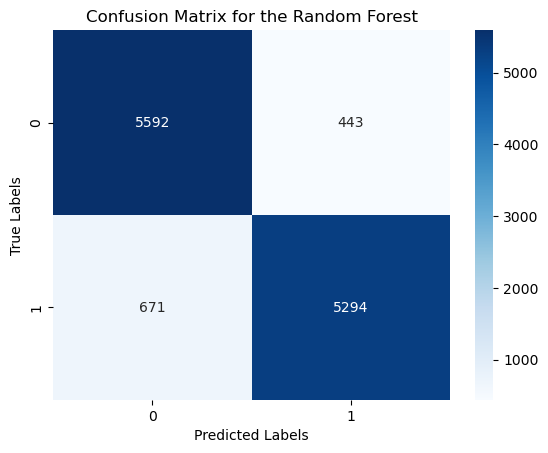

Validation Accuracy: 0.9071666666666667


In [98]:
cm = confusion_matrix(y_val, y_val_pred_RF)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for the Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Validation Accuracy:", val_accuracy_RF)

The cells in the confusion matrix show the number of true and false classifications of the label (label either is 1 or 0). <br> 
We have created the matrix for the ADA Boost model which has the highest accuracy. <br> 
Accuracy is the proportion of our true predictions. <br> 
More precisely: (|True 1| + |True 0|) / (|1| + |0|) <br> 
The performances of the model are rather impressive.

Here we define a fuction which initializes K-Fold Cross Validation and a coresponding ROC curve

In [99]:
X_train = train_df[selected_columns]  
y_train = train_df['label']  

In [100]:
def plot_roc_curves(model, X_train, y_train, title):
    k_folds = 3
    
    # cross validation splitter
    cross_val = StratifiedKFold(n_splits=k_folds)

    tpr_list = []
    fpr_list = []
    auc_scores = []

    # perform k-fold cross-validation
    for train_idx, val_idx in cross_val.split(X_train, y_train):
        # Split the data into training and validation sets for the current fold
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # initialize and train the model
        model.fit(X_train_fold, y_train_fold)

        # predict probabilities for the validation set
        y_val_predprob_fold = model.predict_proba(X_val_fold)[:, 1]

        # compute FPR and TPR for current fold
        fpr, tpr, _ = roc_curve(y_val_fold, y_val_predprob_fold)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

        # calculate the AUC score for current fold
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)

    # plot ROC curves for each fold
    plt.figure(figsize=(6, 4))
    for fold in range(k_folds):
        plt.plot(fpr_list[fold], tpr_list[fold], label=f'Fold {fold+1} (AUC = {auc_scores[fold]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for reference
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curves - {title}')
    plt.legend(loc='lower right')

    plt.show()

Call the function on the models: 

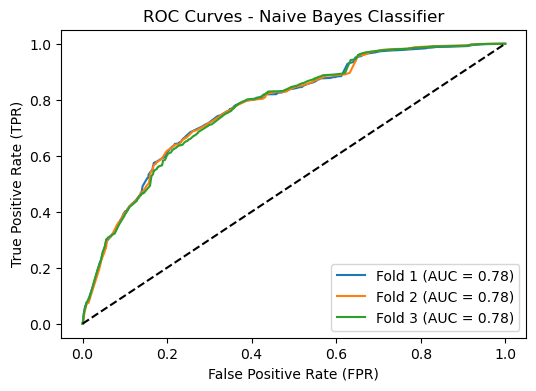

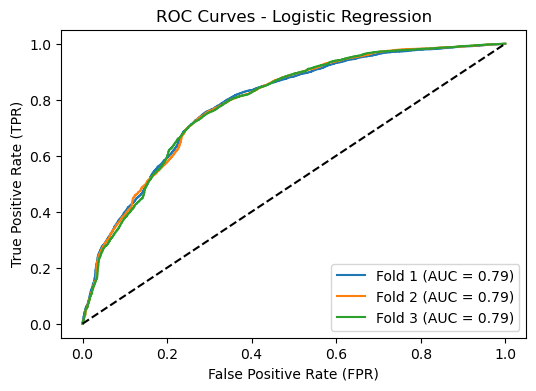

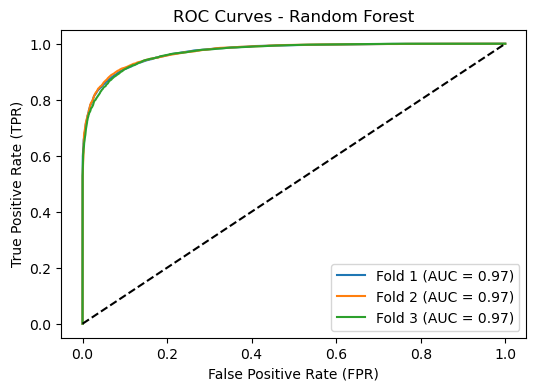

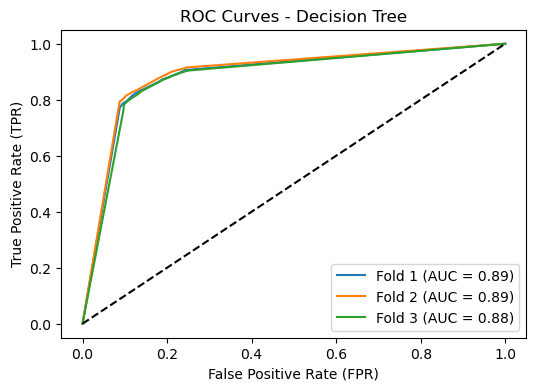

In [101]:
##Naive Bayes Classifier
plot_roc_curves(clf_nb, X_train, y_train, 'Naive Bayes Classifier')

##Logistic Regression
plot_roc_curves(clf_lr, X_train, y_train, 'Logistic Regression')

##Random Forest
plot_roc_curves(best_rf, X_train, y_train, 'Random Forest')

##Decision Tree
plot_roc_curves(best_dt, X_train, y_train, 'Decision Tree')

Initialize Random Forest Classifier on the train test, and compare to the validation

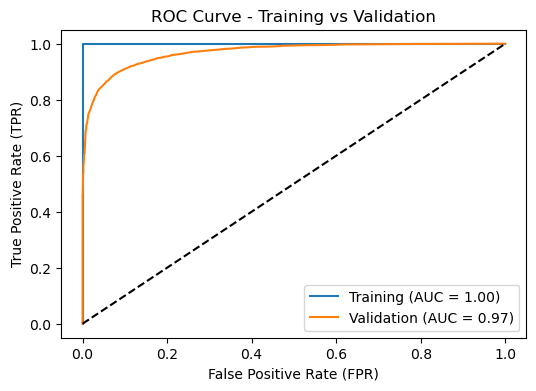

In [102]:
def compare_predictions(y_train, y_train_predprob, y_val, y_val_predprob):
  
    y_train_predprob_positive = y_train_predprob[:, 1]

    #compute FPR and TPR for training set
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predprob_positive)

    #compute the AUC for training set
    roc_auc_train = auc(fpr_train, tpr_train)

    #plot ROC curve for training set
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {roc_auc_train:.2f})')

    y_val_predprob_positive = y_val_predprob[:, 1]

    #Compute FPR and TPR for validation set
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_predprob_positive)

    #compute the AUC for validation set
    roc_auc_val = auc(fpr_val, tpr_val)

    #plot ROC curve for validation set
    plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {roc_auc_val:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for reference
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve - Training vs Validation')
    plt.legend(loc='lower right')
    
    plt.show()

compare_predictions(y_train, y_train_predprob_RF, y_val, y_val_predprob_RF)

We can see the there is a difference in the AUC score between the Train and Validation sets, this happens due to some degree of overfitting since we trained the ADA Boost model on our training set.<br>
Thus, we only consider the score of the Validation set and preprocess the Training and Validation separately.

## Part 5

In [103]:
y_test = test_copy[selected_columns_test]

In [104]:
y_test_predprob = best_rf.predict_proba(y_test)

In [105]:
results_df = pd.DataFrame({'sha256': test_copy['sha256'], 'Probability_1': y_test_predprob[:, 1]})
results_df.to_csv('results_32.csv', index=False)

Pipeline

Worth mentioning that the predictions in the pipeline and in the notebook may vary.
In the pipeline we didn't split the data for Validation trained the best model on the whole Train set.  
In our notebook above, we trained the best model after splitting to Test and Validation.

In [106]:

def main_pipe():
    train_csv = pd.read_csv('train.csv')
    train_copy = train_csv.copy()
    train_copy = train_copy.drop('C', axis=1)
    top_3_values = train_copy['file_type_trid'].value_counts().nlargest(3).index
    encoder = OneHotEncoder(sparse=False)
    categorical_data = train_copy['file_type_trid'].values.reshape(-1, 1)
    encoded_data = encoder.fit_transform(categorical_data)
    column_names = encoder.get_feature_names(['file_type_trid'])
    train_copy = train_copy.drop('file_type_trid', axis=1)
    train_copy = pd.concat([train_copy, pd.DataFrame(encoded_data, columns=column_names)], axis=1)
    label_column = train_copy['label'] 
    train_copy = train_copy.drop('label', axis=1) 
    train_copy['label'] = label_column
    columns_to_delete = [col for col in train_copy.columns if col.startswith('file_type_trid_') and col.split('_')[-1] not in top_3_values]
    train_copy.drop(columns_to_delete, axis=1, inplace=True)
    imputer_vsize = fit_imputer_mean(train_copy, 'vsize')
    imputer_imports = fit_imputer_mean(train_copy, 'imports')
    imputer_exports = fit_imputer_mean(train_copy, 'exports')
    imputer_numstrings = fit_imputer_mean(train_copy, 'numstrings')
    imputer_MZ = fit_imputer_mean(train_copy, 'MZ')
    imputer_printables = fit_imputer_mean(train_copy, 'printables')
    imputer_avlength = fit_imputer_mean(train_copy, 'avlength')
    imputer_A = fit_imputer_mean(train_copy, 'A')
    imputer_B = fit_imputer_mean(train_copy, 'B')
    imputer_has_debug = fit_imputer_knn(train_copy, 'has_debug')
    imputer_has_relocations = fit_imputer_knn(train_copy, 'has_relocations')
    imputer_has_resources = fit_imputer_knn(train_copy, 'has_resources')
    imputer_has_signature = fit_imputer_knn(train_copy, 'has_signature')
    imputer_has_tls = fit_imputer_knn(train_copy, 'has_tls')
    imputer_symbols = fit_imputer_knn(train_copy, 'symbols')
    imputer_urls = fit_imputer_knn(train_copy, 'urls')
    imputer_paths = fit_imputer_knn(train_copy, 'paths')
    imputer_registry = fit_imputer_knn(train_copy, 'registry')
    train_copy['size'] = np.log(train_copy['size'])
    train_copy['vsize'] = np.log(train_copy['vsize'])
    train_copy['imports'] = np.where(train_copy['imports'] > 0, np.log(train_copy['imports']), 0)
    train_copy['exports'] = np.where(train_copy['exports'] > 0, np.log(train_copy['exports']), 0)
    train_copy['numstrings'] = np.log(train_copy['numstrings'])
    train_copy['printables'] = np.log(train_copy['printables'])
    train_copy['vsize_diff'] = (train_copy['vsize'] - train_copy['size']).abs()
    train_copy.insert(3, 'vsize_diff', train_copy.pop('vsize_diff'))
    train_copy.drop(['size', 'vsize'], axis=1, inplace=True)
    imputer_A_mean, imputer_A_std = fit_outliers_z_score(train_copy, 'A', 2.8)
    outlier_imputer_registry = fit_outliers_isolation_forest(train_copy, 'registry')
    outlier_imputer_urls = fit_outliers_isolation_forest(train_copy, 'urls')
    outlier_imputer_B = fit_outliers_isolation_forest(train_copy, 'B')
    outlier_imputer_exports = fit_outliers_isolation_forest(train_copy, 'exports')
    outlier_imputer_imports = fit_outliers_isolation_forest(train_copy, 'imports')
    outlier_imputer_vsize_diff = fit_outliers_isolation_forest(train_copy, 'vsize_diff')
    selected_columns = train_copy.columns[1:-1]
    X_train = train_copy[selected_columns].values
    y_train = train_copy['label'].values
    selected_features, discarded_features, cp_scores = forward_selection(X_train, y_train, selected_columns)
    print("Selected features:")
    for feature in selected_features:
        print(f"- {feature}")
    print(f"\nNumber of Selected features: {len(selected_features)}")
    print("\nDiscarded features:")
    for feature in discarded_features:
        print(f"- {feature}")
    files_to_drop = ['file_type_trid_Win32 Executable (generic)', 'file_type_trid_Win32 Executable MS Visual C++ (generic)', 'file_type_trid_Win64 Executable (generic)']
    train_copy.drop(files_to_drop, axis=1, inplace=True)
    test_csv = pd.read_csv('test.csv')
    test_copy = test_csv.copy()
    transform_imputer_mean(test_copy, imputer_vsize, 'vsize')
    transform_imputer_mean(test_copy, imputer_imports, 'imports')
    transform_imputer_mean(test_copy, imputer_exports, 'exports')
    transform_imputer_mean(test_copy, imputer_numstrings, 'numstrings')
    transform_imputer_mean(test_copy, imputer_MZ, 'MZ')
    transform_imputer_mean(test_copy, imputer_printables, 'printables')
    transform_imputer_mean(test_copy, imputer_avlength, 'avlength')
    transform_imputer_mean(test_copy, imputer_A, 'A')
    transform_imputer_mean(test_copy, imputer_B, 'B')
    transform_imputer_knn(test_copy, imputer_has_debug, 'has_debug')
    transform_imputer_knn(test_copy, imputer_has_relocations, 'has_relocations')
    transform_imputer_knn(test_copy, imputer_has_resources, 'has_resources')
    transform_imputer_knn(test_copy, imputer_has_signature, 'has_signature')
    transform_imputer_knn(test_copy, imputer_has_tls, 'has_tls')
    transform_imputer_knn(test_copy, imputer_symbols, 'symbols')
    transform_imputer_knn(test_copy, imputer_urls, 'urls')
    transform_imputer_knn(test_copy, imputer_paths,'paths')
    transform_imputer_knn(test_copy, imputer_registry,'registry')
    test_copy['size'] = np.log(test_copy['size'])
    test_copy['vsize'] = np.log(test_copy['vsize'])
    test_copy['imports'] = np.where(test_copy['imports'] > 0, np.log(test_copy['imports']), 0)
    test_copy['exports'] = np.where(test_copy['exports'] > 0, np.log(test_copy['exports']), 0)
    test_copy['numstrings'] = np.log(test_copy['numstrings'])
    test_copy['printables'] = np.log(test_copy['printables'])
    test_copy['vsize_diff'] = (test_copy['vsize'] - test_copy['size']).abs()
    test_copy.insert(3, 'vsize_diff', test_copy.pop('vsize_diff'))
    test_copy.drop(['size', 'vsize', 'C', 'file_type_trid'], axis=1, inplace=True)
    transform_outliers_z_score(test_copy, 'A', 2.8, imputer_A_mean, imputer_A_std)
    transform_outliers_isolation_forest(test_copy, outlier_imputer_registry, 'registry')
    transform_outliers_isolation_forest(test_copy, outlier_imputer_urls, 'urls')
    transform_outliers_isolation_forest(test_copy, outlier_imputer_B, 'B')
    transform_outliers_isolation_forest(test_copy, outlier_imputer_exports, 'exports')
    transform_outliers_isolation_forest(test_copy, outlier_imputer_imports, 'imports')
    transform_outliers_isolation_forest(test_copy, outlier_imputer_vsize_diff, 'vsize_diff')
    selected_columns = train_copy.columns[1:-1]
    X_train = train_copy[selected_columns]  
    y_train = train_copy['label']  
    selected_columns_test = test_copy.columns[1:]
    X_test = test_copy[selected_columns_test]
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 5],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt']
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    best_rf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_rf.fit(X_train, y_train)
    y_val_pred_RF = best_rf.predict(X_val)
    y_val_predprob_RF = best_rf.predict_proba(X_val)
    y_train_predprob_RF = best_rf.predict_proba(X_train)
    val_accuracy_RF = accuracy_score(y_val, y_val_pred_RF)
    y_test = test_copy[selected_columns_test]
    y_test_predprob = best_rf.predict_proba(y_test)
    results_df = pd.DataFrame({'sha256': test_copy['sha256'], 'Probability_1': y_test_predprob[:, 1]})
    results_df.to_csv('results_32.csv', index=False)


In [107]:

start_time = time.time()
main_pipe()
print("\n- %s seconds -" % (time.time() - start_time))


'\nstart_time = time.time()\nmain_pipe()\nprint("\n- %s seconds -" % (time.time() - start_time))\n'